### Perform a complete EDA workflow on a given dataset:  Data cleaning, Univariate & bivariate analysis, Outlier detection, Missing value treatment, Feature correlation analysis.And also Preprocessing using ColumnTransformer to handle missing values, encode categorical data, and scale numerical features.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("adult.csv")

In [5]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [11]:
df.tail()

age workclass  fnlwgt     education  education.num      marital.status  \
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [9]:
df['age'].mean()

np.float64(38.58164675532078)

In [10]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [12]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [17]:
df['education'].unique()
# df['marital.status'].unique
# df['occupation'].unique
# df['relationship'].unique
# df['race'].unique
# df['sex'].unique
# df['native.country'].unique
# df['income'].unique

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [18]:
# df['education'].unique
df['marital.status'].unique()
# df['occupation'].unique
# df['relationship'].unique
# df['race'].unique
# df['sex'].unique
# df['native.country'].unique
# df['income'].unique

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [19]:
# df['education'].unique
# df['marital.status'].unique()
df['occupation'].unique()
# df['relationship'].unique
# df['race'].unique
# df['sex'].unique
# df['native.country'].unique
# df['income'].unique

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [20]:
# df['education'].unique
# df['marital.status'].unique()
# df['occupation'].unique()
df['relationship'].unique()
# df['race'].unique
# df['sex'].unique
# df['native.country'].unique
# df['income'].unique

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [21]:
# df['education'].unique
# df['marital.status'].unique()
# df['occupation'].unique()
# df['relationship'].unique()
df['race'].unique()
# df['sex'].unique
# df['native.country'].unique
# df['income'].unique

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [22]:
# df['education'].unique
# df['marital.status'].unique()
# df['occupation'].unique()
# df['relationship'].unique()
# df['race'].unique()
df['sex'].unique()
# df['native.country'].unique
# df['income'].unique

array(['Female', 'Male'], dtype=object)

In [23]:
# df['education'].unique
# df['marital.status'].unique()
# df['occupation'].unique()
# df['relationship'].unique()
# df['race'].unique()
# df['sex'].unique
df['native.country'].unique()
# df['income'].unique

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [24]:
# df['education'].unique
# df['marital.status'].unique()
# df['occupation'].unique()
# df['relationship'].unique()
# df['race'].unique()
# df['sex'].unique
# df['native.country'].unique()
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [26]:
df = df.replace('?', np.nan)

In [27]:
df['workclass'].unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [29]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

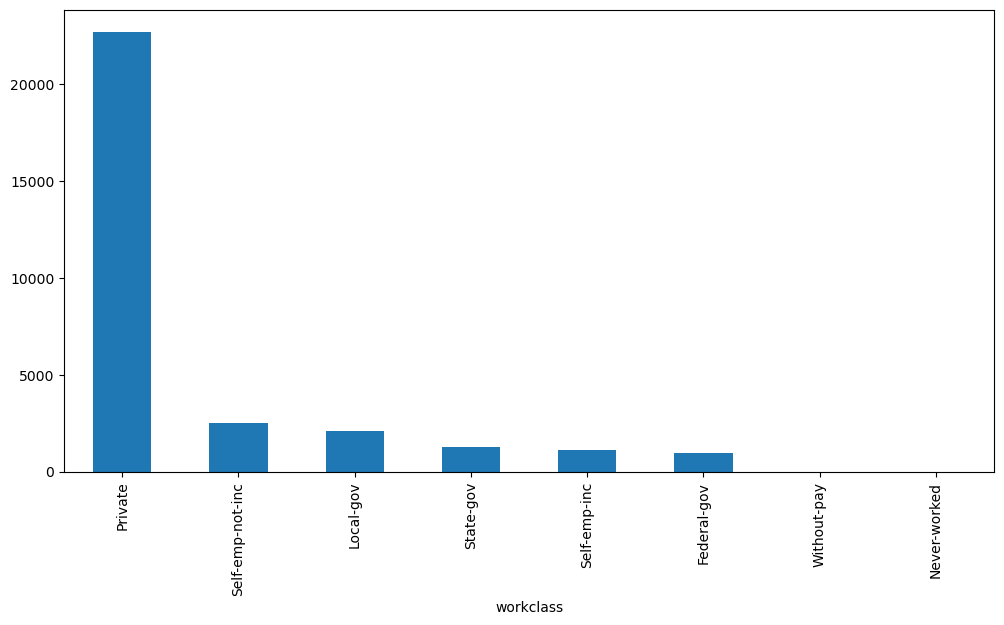

In [35]:
plt.figure(figsize = (12,6))
df['workclass'].value_counts().plot(kind = 'bar')
plt.show()

In [36]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

In [37]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [39]:
plt.figure(figsize = (12,6))
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

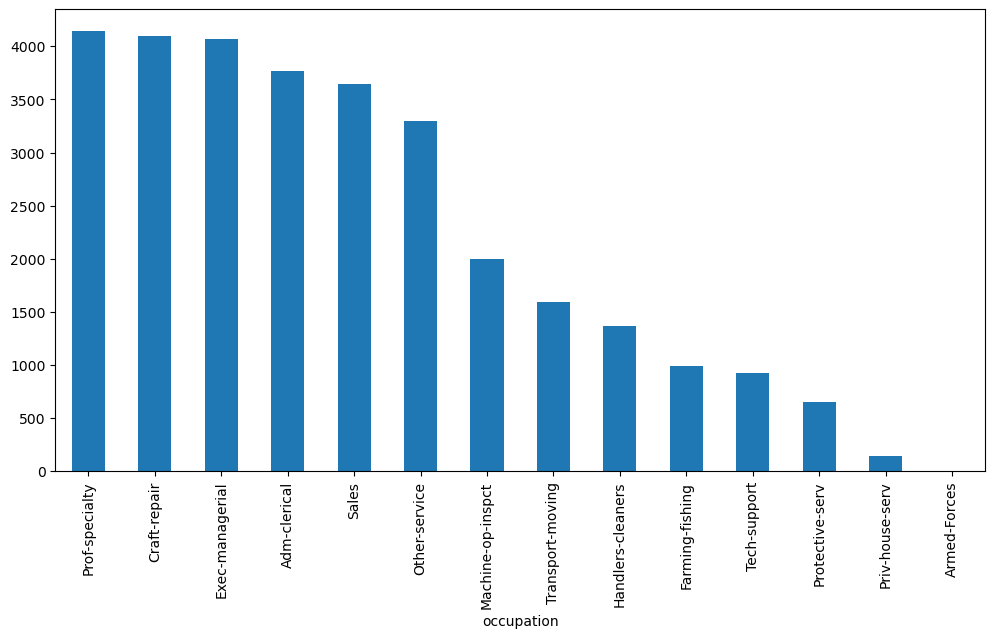

In [40]:
plt.figure(figsize = (12,6))
df['occupation'].value_counts().plot(kind = 'bar')
plt.show()

In [45]:
df['occupation'].value_counts().sum()
# df['age'].value_counts()
# df['education'].value_counts()

np.int64(30718)

In [47]:
# df['occupation'].value_counts().sum()
df['age'].value_counts().sum()
# df['education'].value_counts()

np.int64(32561)

In [49]:
# df['occupation'].value_counts().sum()
# df['age'].value_counts().sum()
df['education'].value_counts().sum()

np.int64(32561)

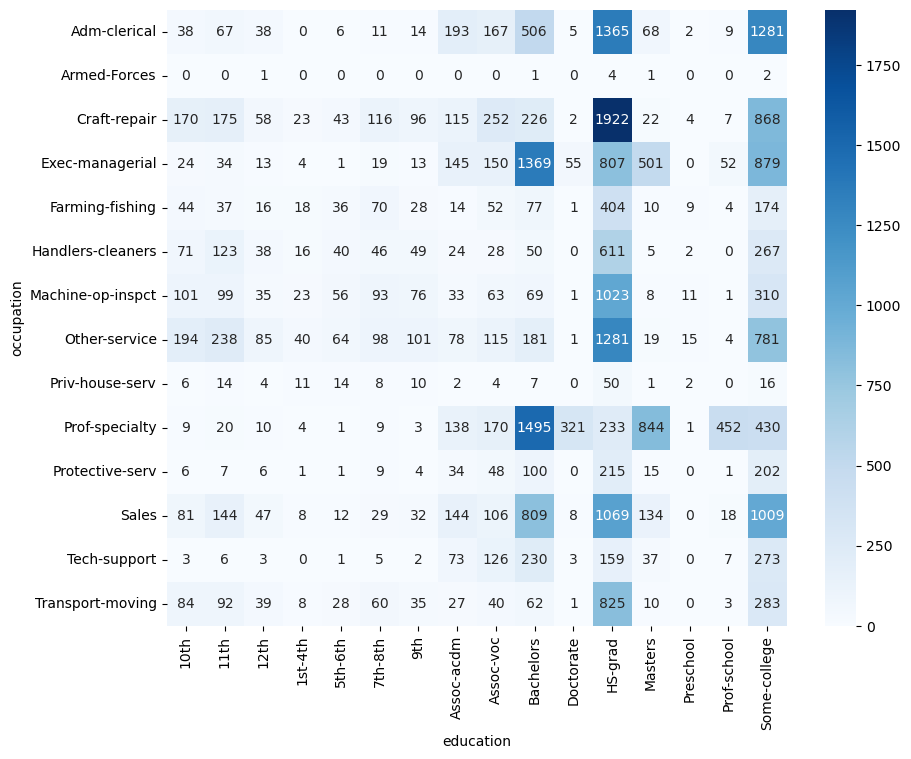

In [50]:
cross_tab = pd.crosstab(df['occupation'], df['education'])

plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.show()

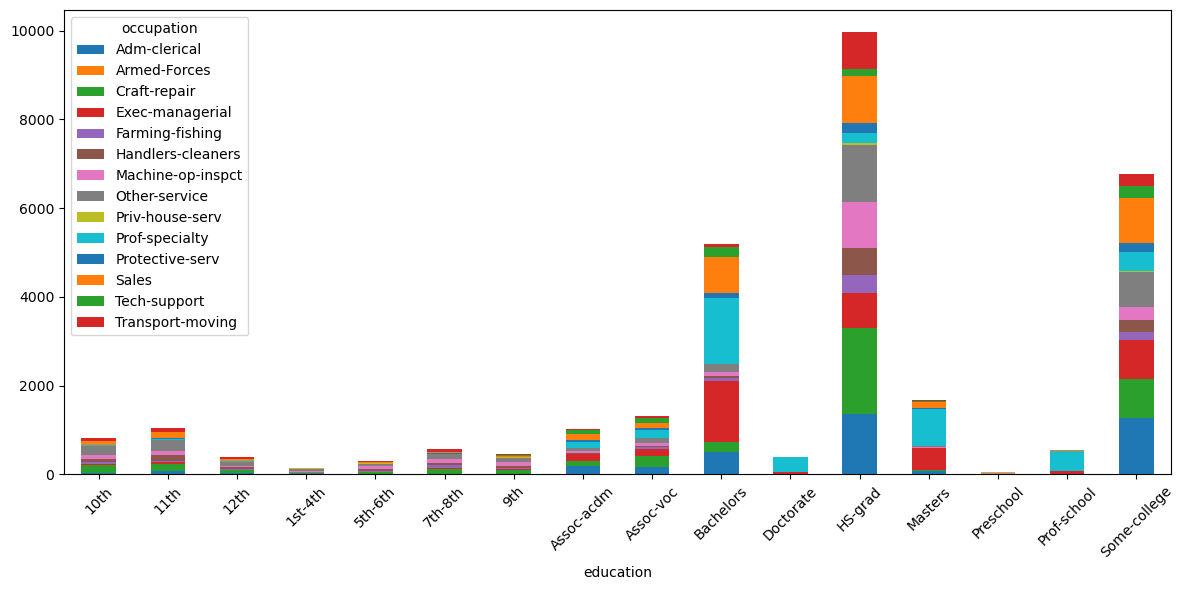

In [52]:
cross_tab = pd.crosstab(df['education'], df['occupation'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xticks(rotation=45)
plt.legend(title='occupation')
plt.tight_layout()
plt.show()

## Key insights
Higher eduaction level like masters, professional, doctorate are mostly Exec-managerial or Prof-specialty


In [58]:
def tiered_occupation_imputation(df):
    df_imputed = df.copy()
    high_education = ['Masters', 'Prof-school', 'Doctorate']
    high_edu_mask = df_imputed['education'].isin(high_education) & df_imputed['occupation'].isnull()
    high_edu_missing_count = high_edu_mask.sum()
    if high_edu_missing_count > 0:
        high_edu_imputation = np.random.choice(
            ['Exec-managerial', 'Prof-specialty'],
            size=high_edu_missing_count,
            p=[0.7, 0.3]  # 70% Exec-managerial, 30% Prof-specialty
        )
        df_imputed.loc[high_edu_mask, 'occupation'] = high_edu_imputation
    remaining_mask = df_imputed['occupation'].isnull()
    remaining_missing_count = remaining_mask.sum()
    if remaining_missing_count > 0:
        occupation_probs = df_imputed['occupation'].value_counts(normalize=True)
        random_occupations = np.random.choice(
            occupation_probs.index,
            size=remaining_missing_count,
            p=occupation_probs.values
        )
        df_imputed.loc[remaining_mask, 'occupation'] = random_occupations
    missing_after = df_imputed['occupation'].isnull().sum()
    return df_imputed
df = tiered_occupation_imputation(df)    

In [62]:
df['occupation'].value_counts()

occupation
Prof-specialty       4411
Exec-managerial      4370
Craft-repair         4335
Adm-clerical         3992
Sales                3844
Other-service        3486
Machine-op-inspct    2106
Transport-moving     1689
Handlers-cleaners    1449
Farming-fishing      1064
Tech-support          971
Protective-serv       675
Priv-house-serv       159
Armed-Forces           10
Name: count, dtype: int64

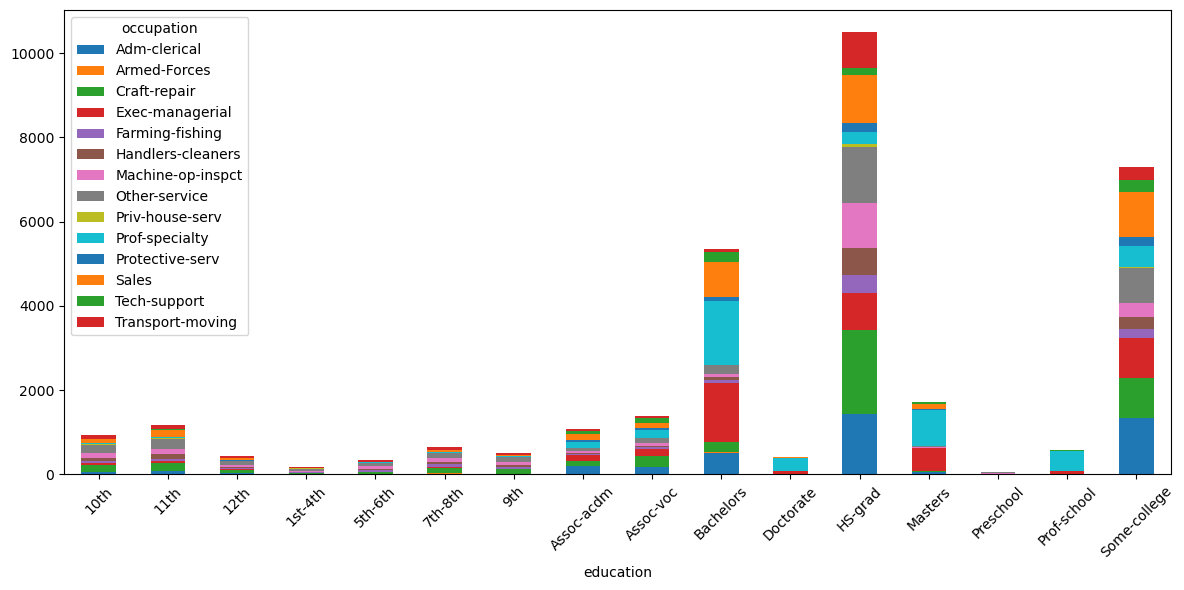

In [63]:
cross_tab = pd.crosstab(df['education'], df['occupation'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xticks(rotation=45)
plt.legend(title='occupation')
plt.tight_layout()
plt.show()

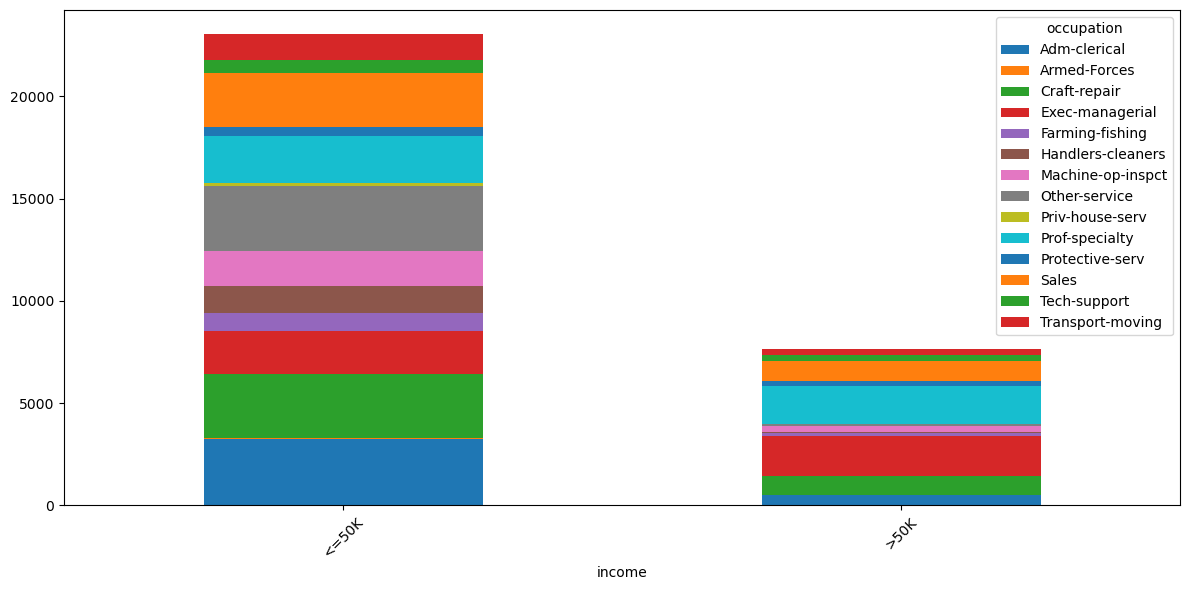

In [53]:
cross_tab = pd.crosstab(df['income'], df['occupation'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xticks(rotation=45)
plt.legend(title='occupation')
plt.tight_layout()
plt.show()

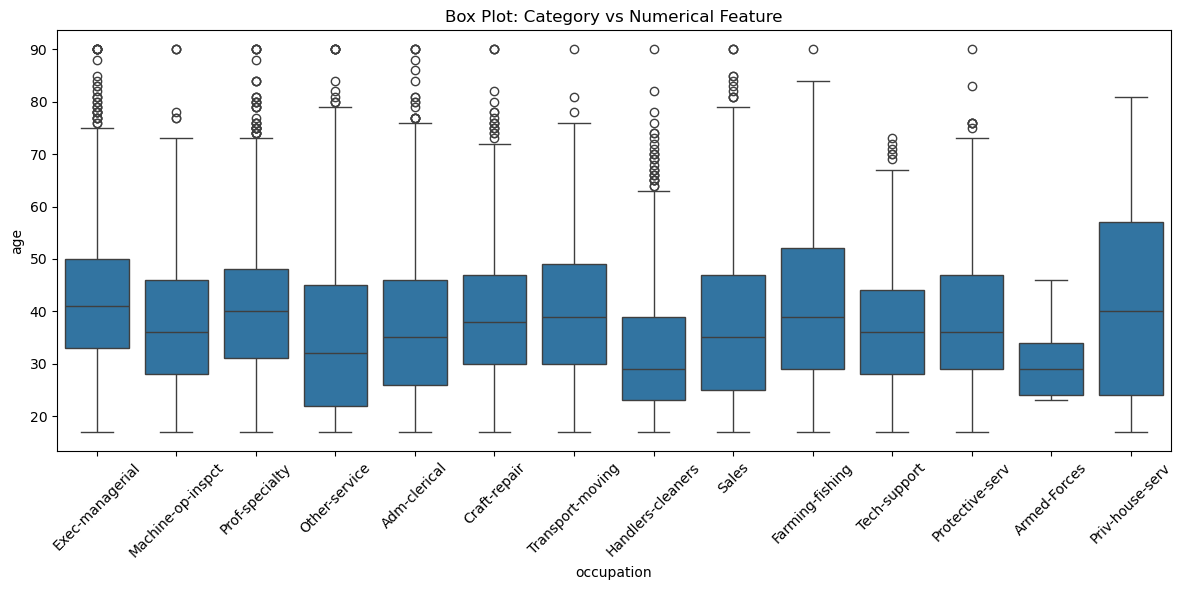

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='occupation', y='age', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot: Category vs Numerical Feature')
plt.tight_layout()
plt.show()

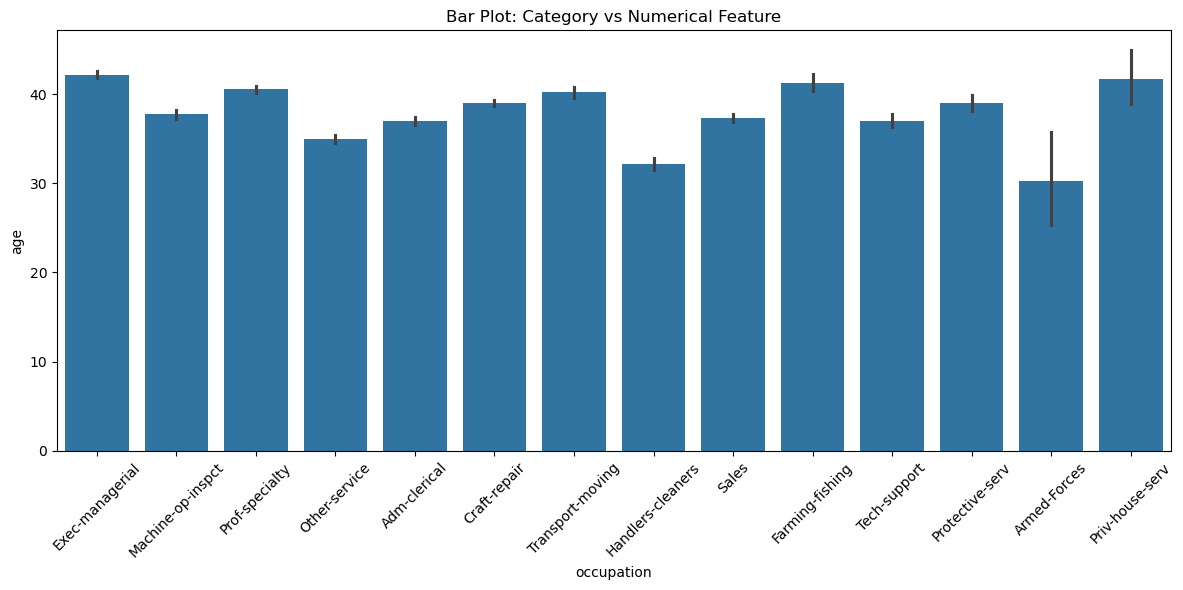

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x='occupation', y='age', data=df)
plt.xticks(rotation=45)
plt.title('Bar Plot: Category vs Numerical Feature')
plt.tight_layout()
plt.show()

In [64]:
## Missing values in the native country column

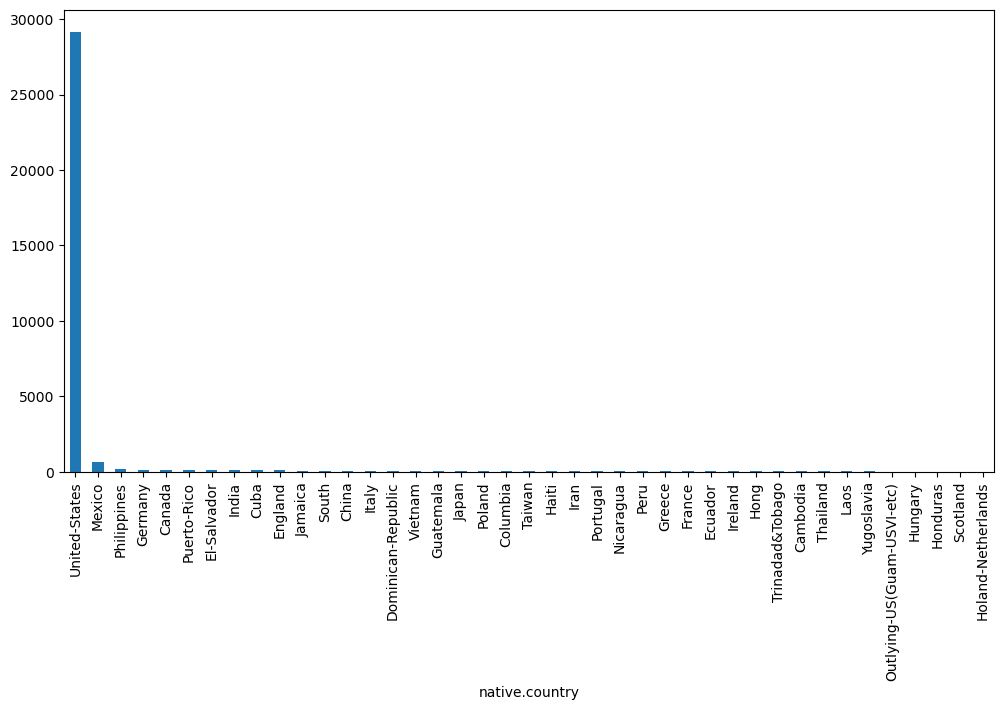

In [65]:
plt.figure(figsize = (12,6))
df['native.country'].value_counts().plot(kind = 'bar')
plt.show()

In [66]:
df['native.country'] = df['native.country'].fillna(df['native.country'].mode()[0])

In [67]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Univariate and Bivariate Analysis

In [69]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

In [70]:
print(cat_col)
print(num_col)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


Basic Statistics:
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


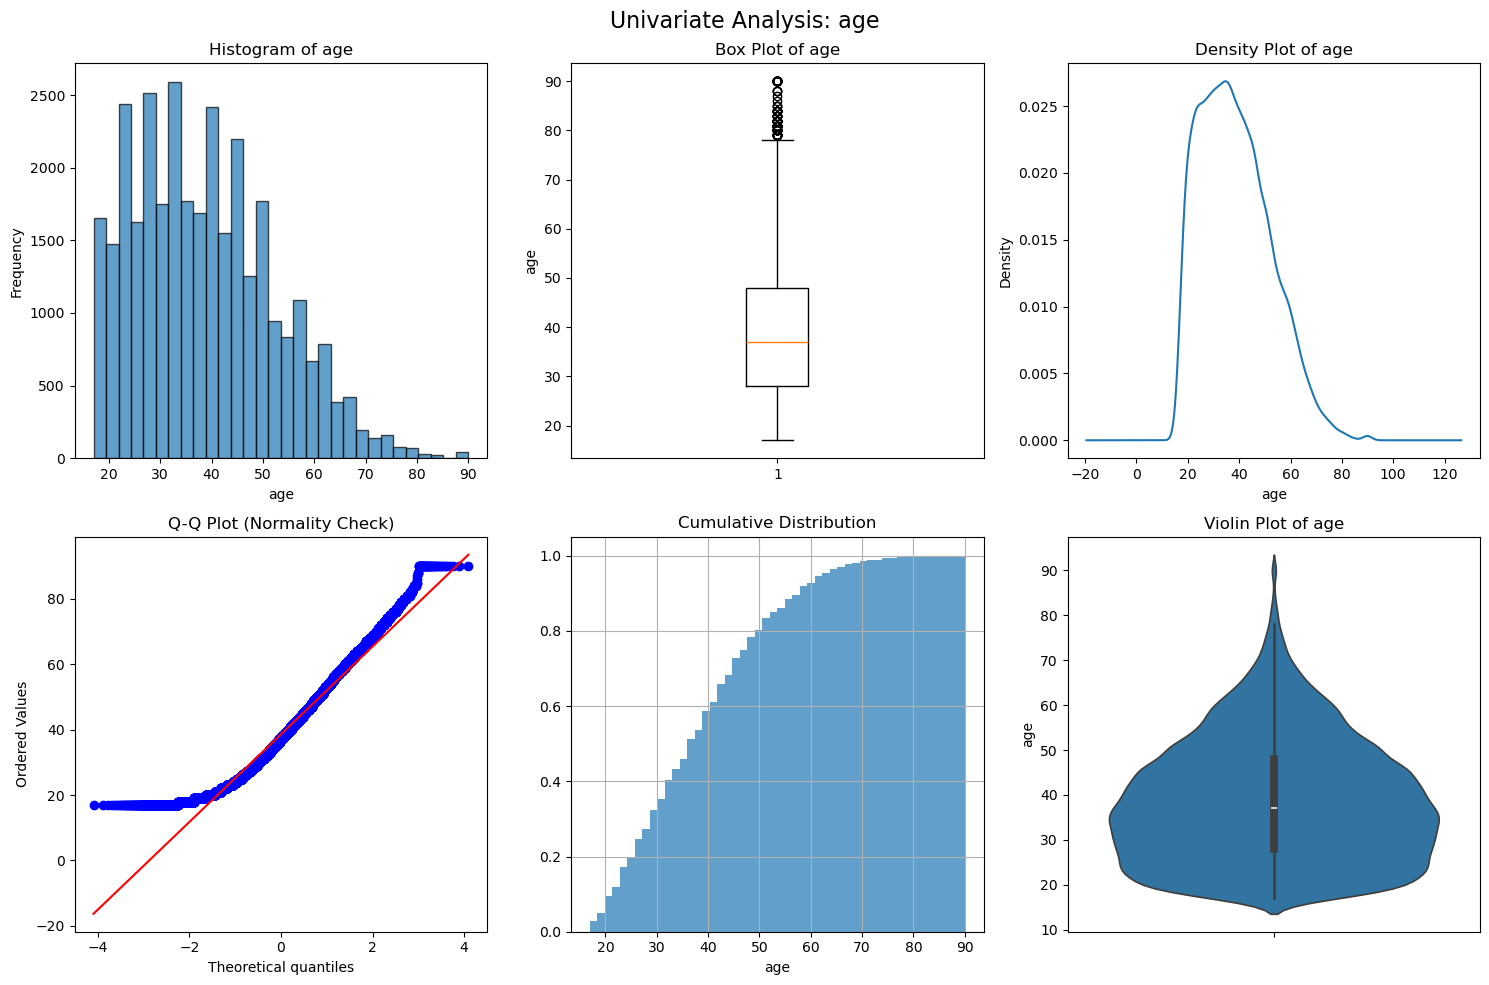

Skewness: 0.559
Kurtosis: -0.166
Missing values: 0 (0.00%)
Basic Statistics:
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


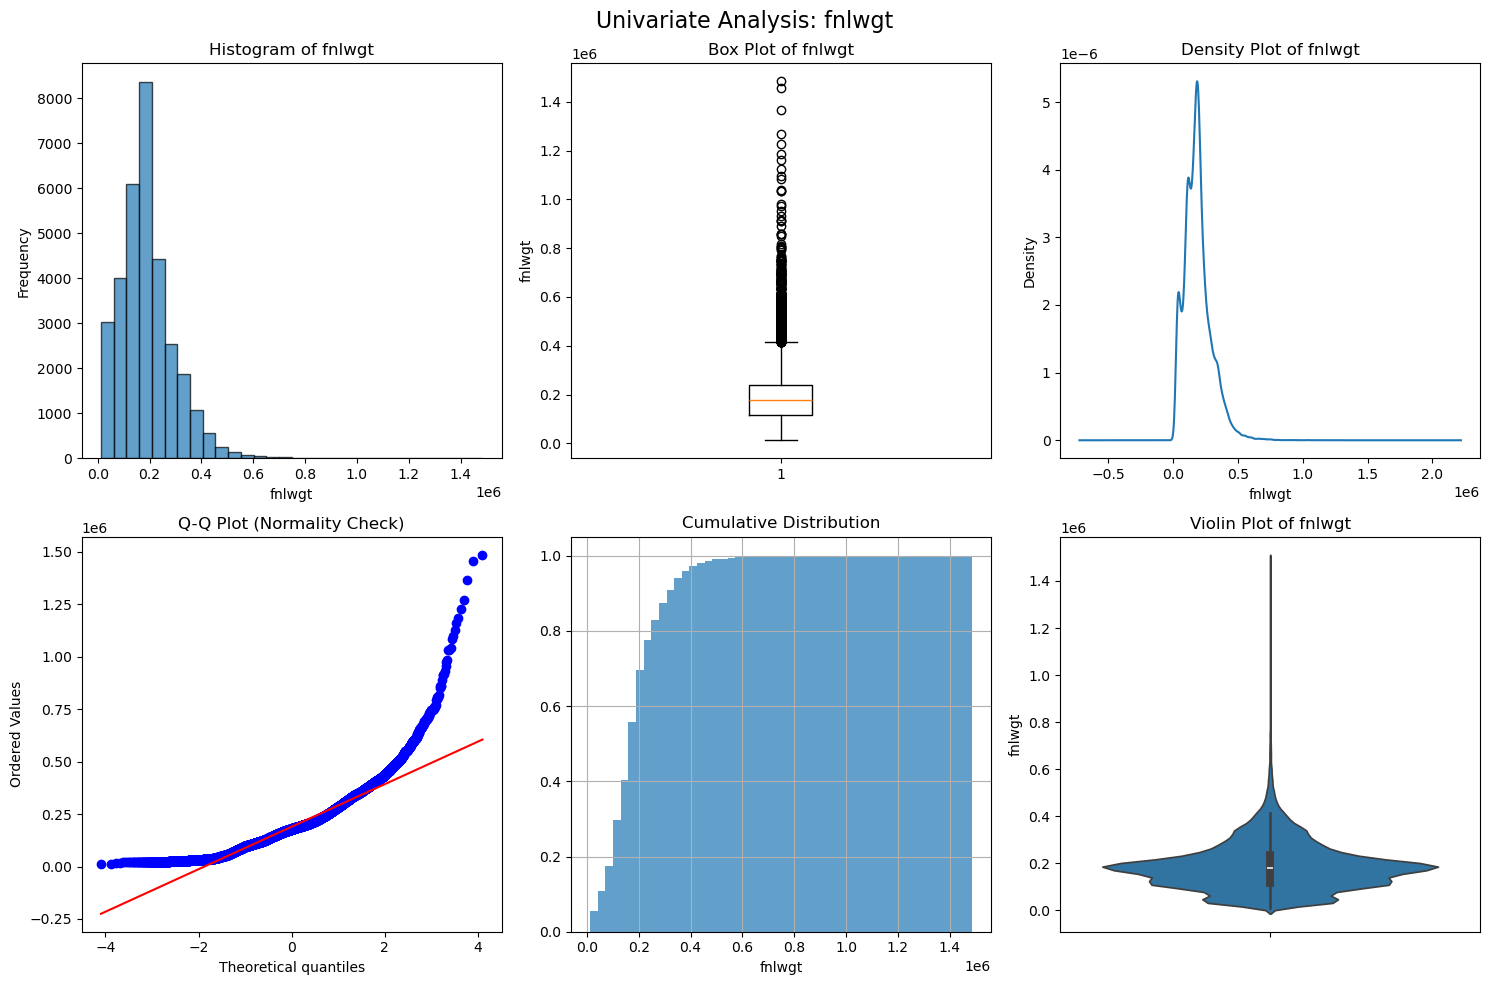

Skewness: 1.447
Kurtosis: 6.219
Missing values: 0 (0.00%)
Basic Statistics:
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64


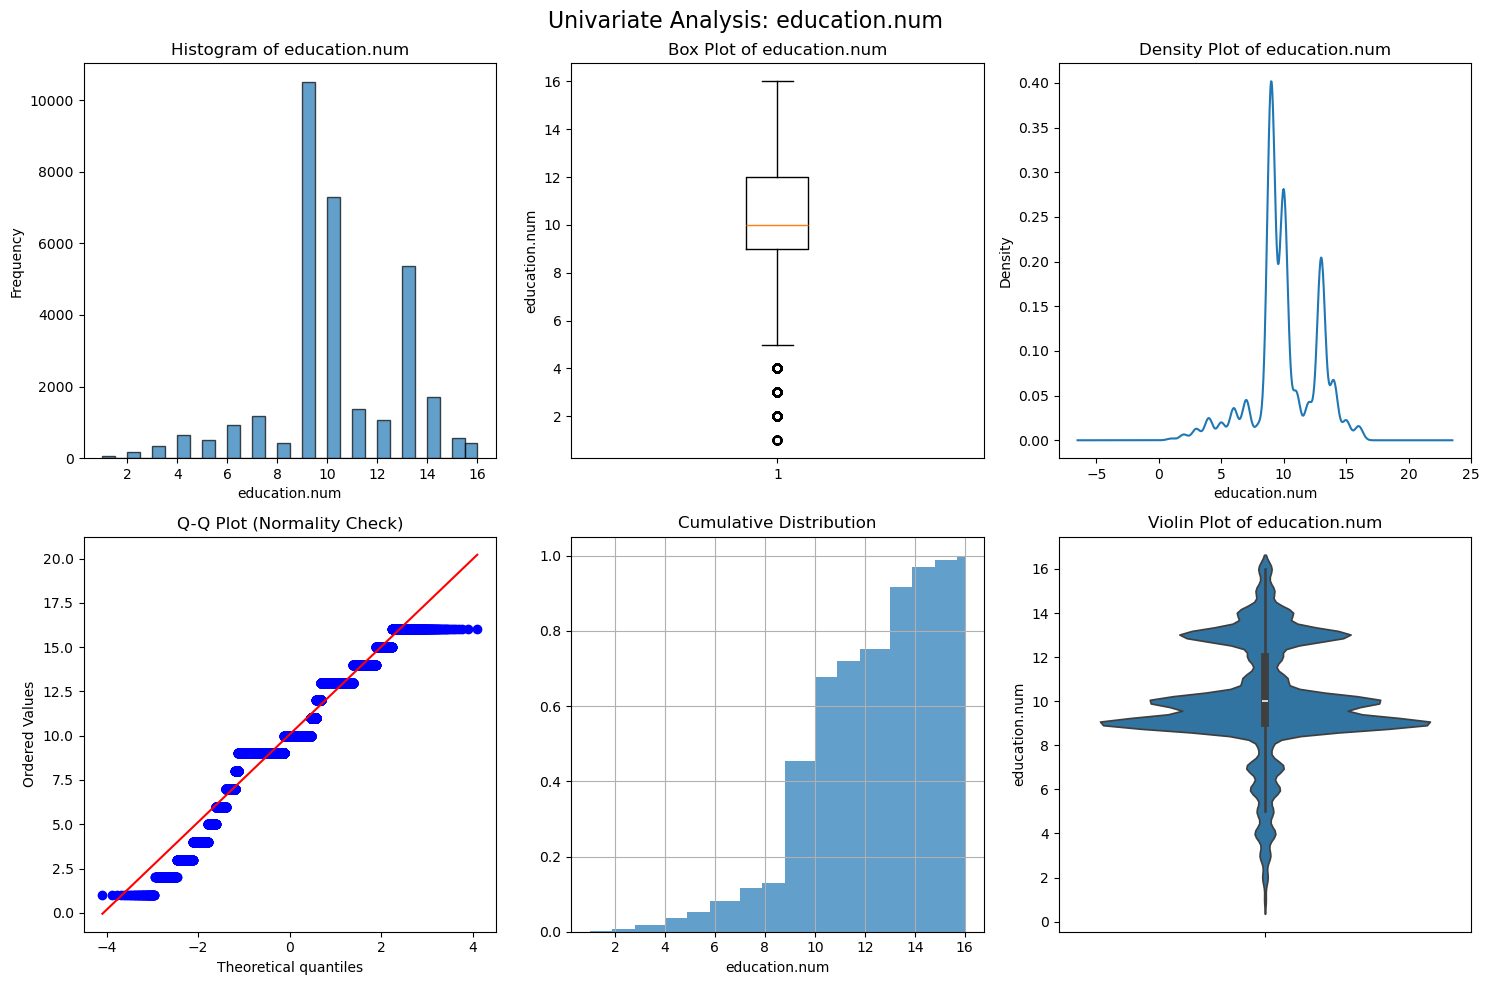

Skewness: -0.312
Kurtosis: 0.623
Missing values: 0 (0.00%)
Basic Statistics:
count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64


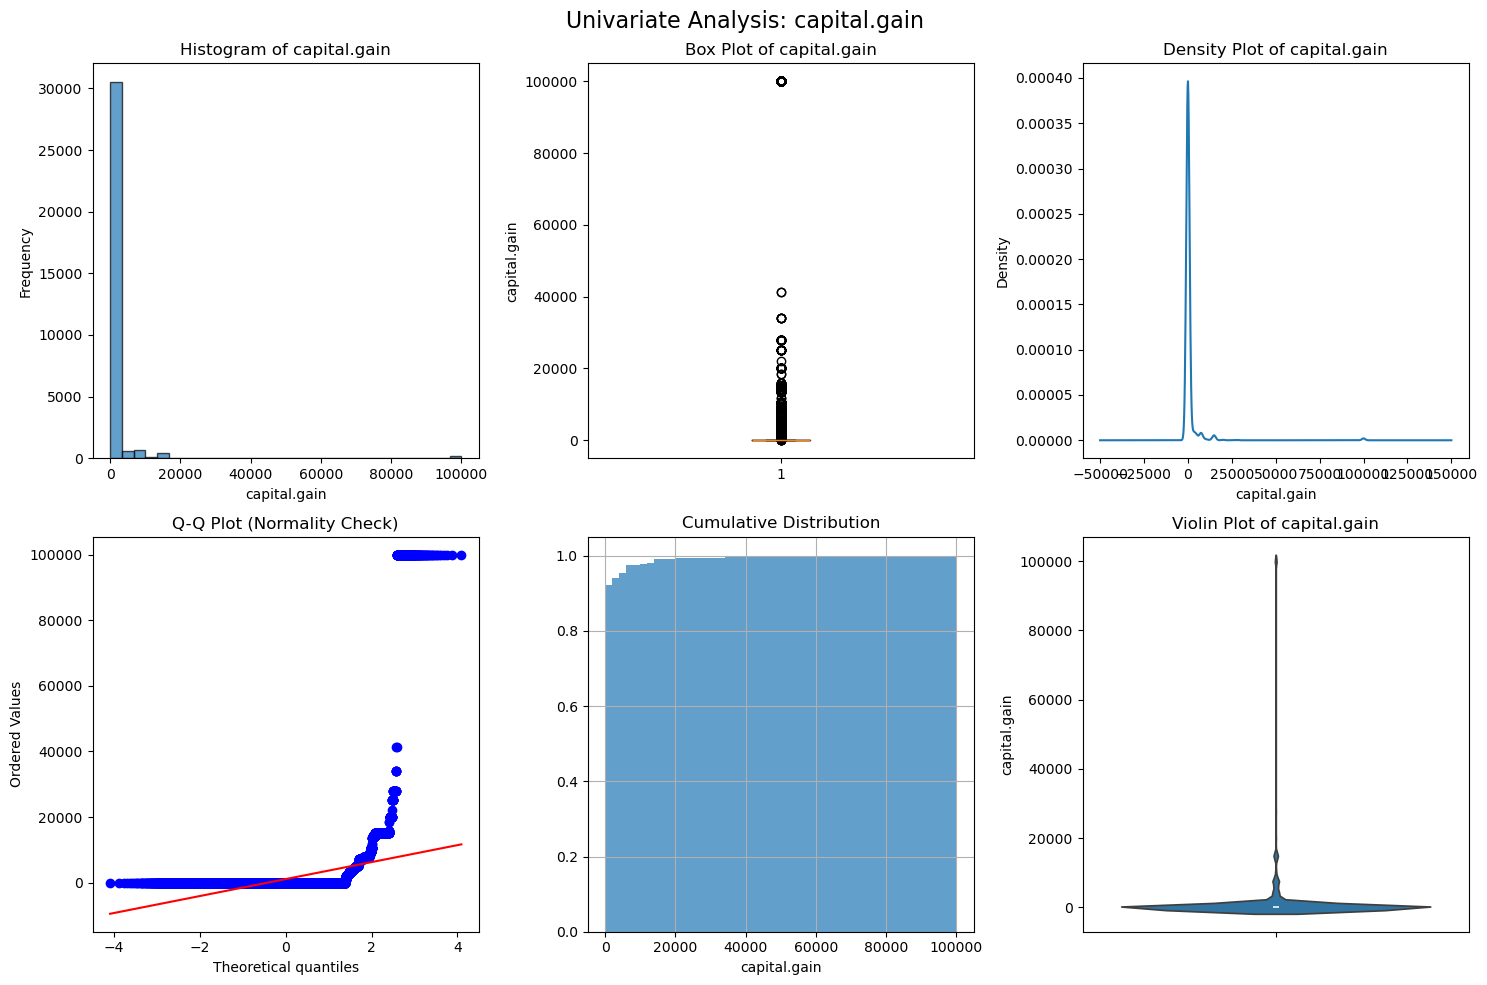

Skewness: 11.954
Kurtosis: 154.799
Missing values: 0 (0.00%)
Basic Statistics:
count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64


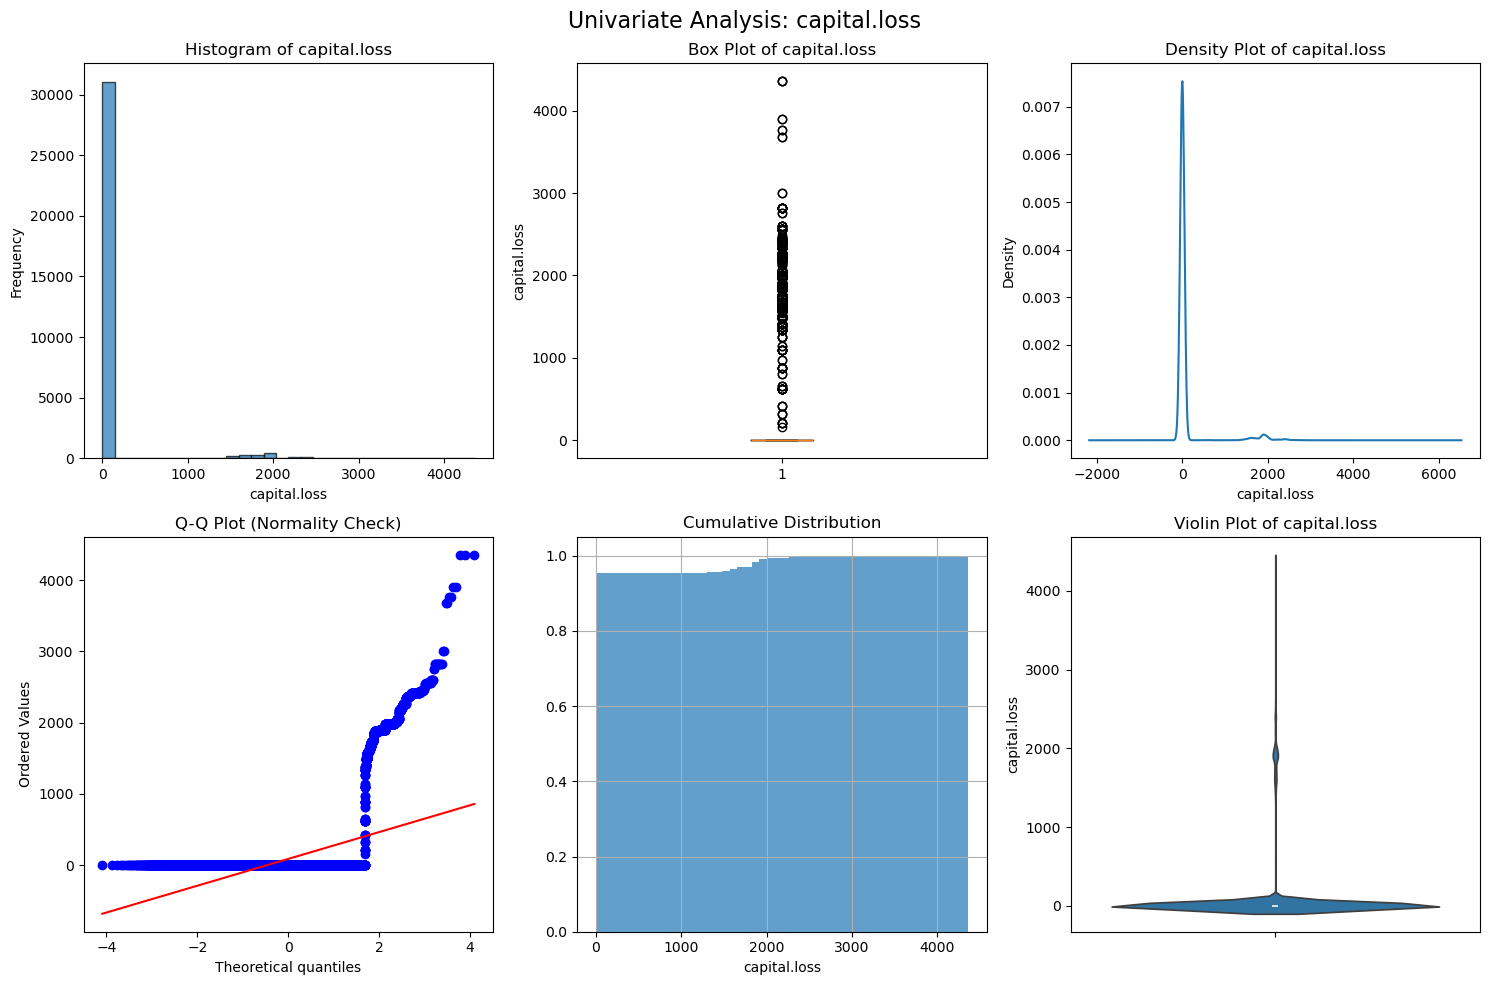

Skewness: 4.595
Kurtosis: 20.377
Missing values: 0 (0.00%)
Basic Statistics:
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64


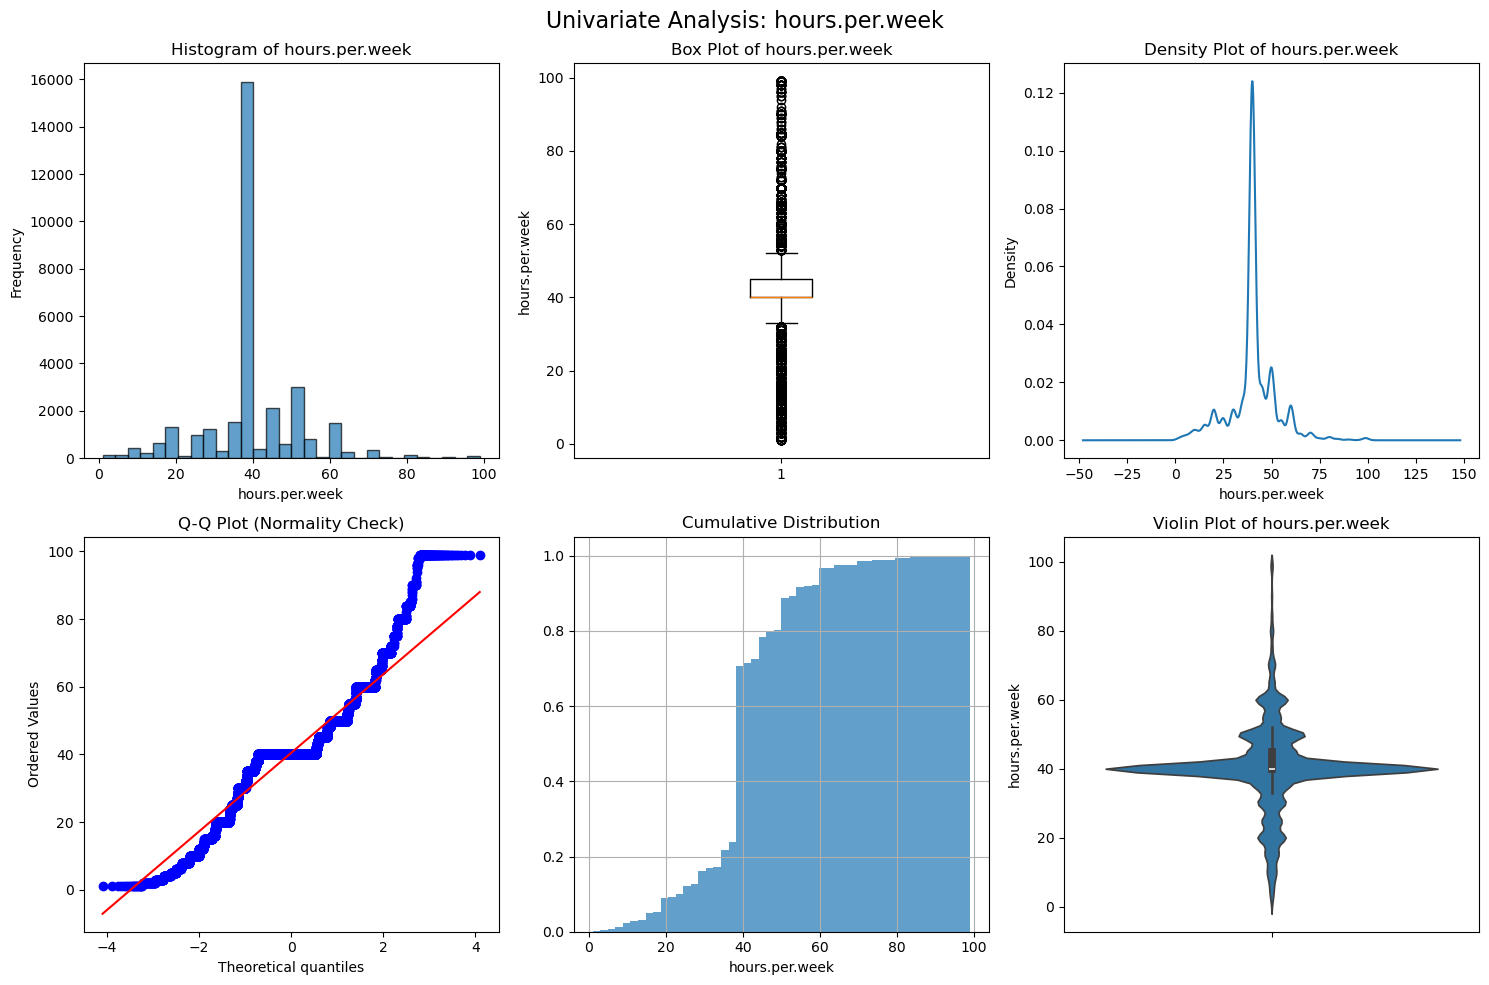

Skewness: 0.228
Kurtosis: 2.917
Missing values: 0 (0.00%)


In [73]:
## Univariate Analysis

def univariate_numerical_analysis(df, numerical_columns):
    
    for col in numerical_columns:
        
        # Basic statistics
        print("Basic Statistics:")
        print(df[col].describe())
        
        # Create subplots
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle(f'Univariate Analysis: {col}', fontsize=16)
        
        # Histogram
        axes[0,0].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[0,0].set_title(f'Histogram of {col}')
        axes[0,0].set_xlabel(col)
        axes[0,0].set_ylabel('Frequency')
        
        # Box plot
        axes[0,1].boxplot(df[col])
        axes[0,1].set_title(f'Box Plot of {col}')
        axes[0,1].set_ylabel(col)
        
        # Density plot
        df[col].plot(kind='density', ax=axes[0,2])
        axes[0,2].set_title(f'Density Plot of {col}')
        axes[0,2].set_xlabel(col)
        
        # Q-Q plot (normality check)
        from scipy import stats
        stats.probplot(df[col].dropna(), dist="norm", plot=axes[1,0])
        axes[1,0].set_title(f'Q-Q Plot (Normality Check)')
        
        # Cumulative distribution
        df[col].hist(cumulative=True, density=1, bins=50, ax=axes[1,1], alpha=0.7)
        axes[1,1].set_title(f'Cumulative Distribution')
        axes[1,1].set_xlabel(col)
        
        # Violin plot
        sns.violinplot(y=df[col], ax=axes[1,2])
        axes[1,2].set_title(f'Violin Plot of {col}')
        
        plt.tight_layout()
        plt.show()
        
        # Skewness and Kurtosis
        print(f"Skewness: {df[col].skew():.3f}")
        print(f"Kurtosis: {df[col].kurtosis():.3f}")
        
        # Missing values
        missing = df[col].isnull().sum()
        print(f"Missing values: {missing} ({missing/len(df)*100:.2f}%)")

# Usage
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']  # Adjust based on your dataset
univariate_numerical_analysis(df, numerical_cols)

Value Counts:
  Private: 24532 (75.3%)
  Self-emp-not-inc: 2541 (7.8%)
  Local-gov: 2093 (6.4%)
  State-gov: 1298 (4.0%)
  Self-emp-inc: 1116 (3.4%)
  Federal-gov: 960 (2.9%)
  Without-pay: 14 (0.0%)
  Never-worked: 7 (0.0%)


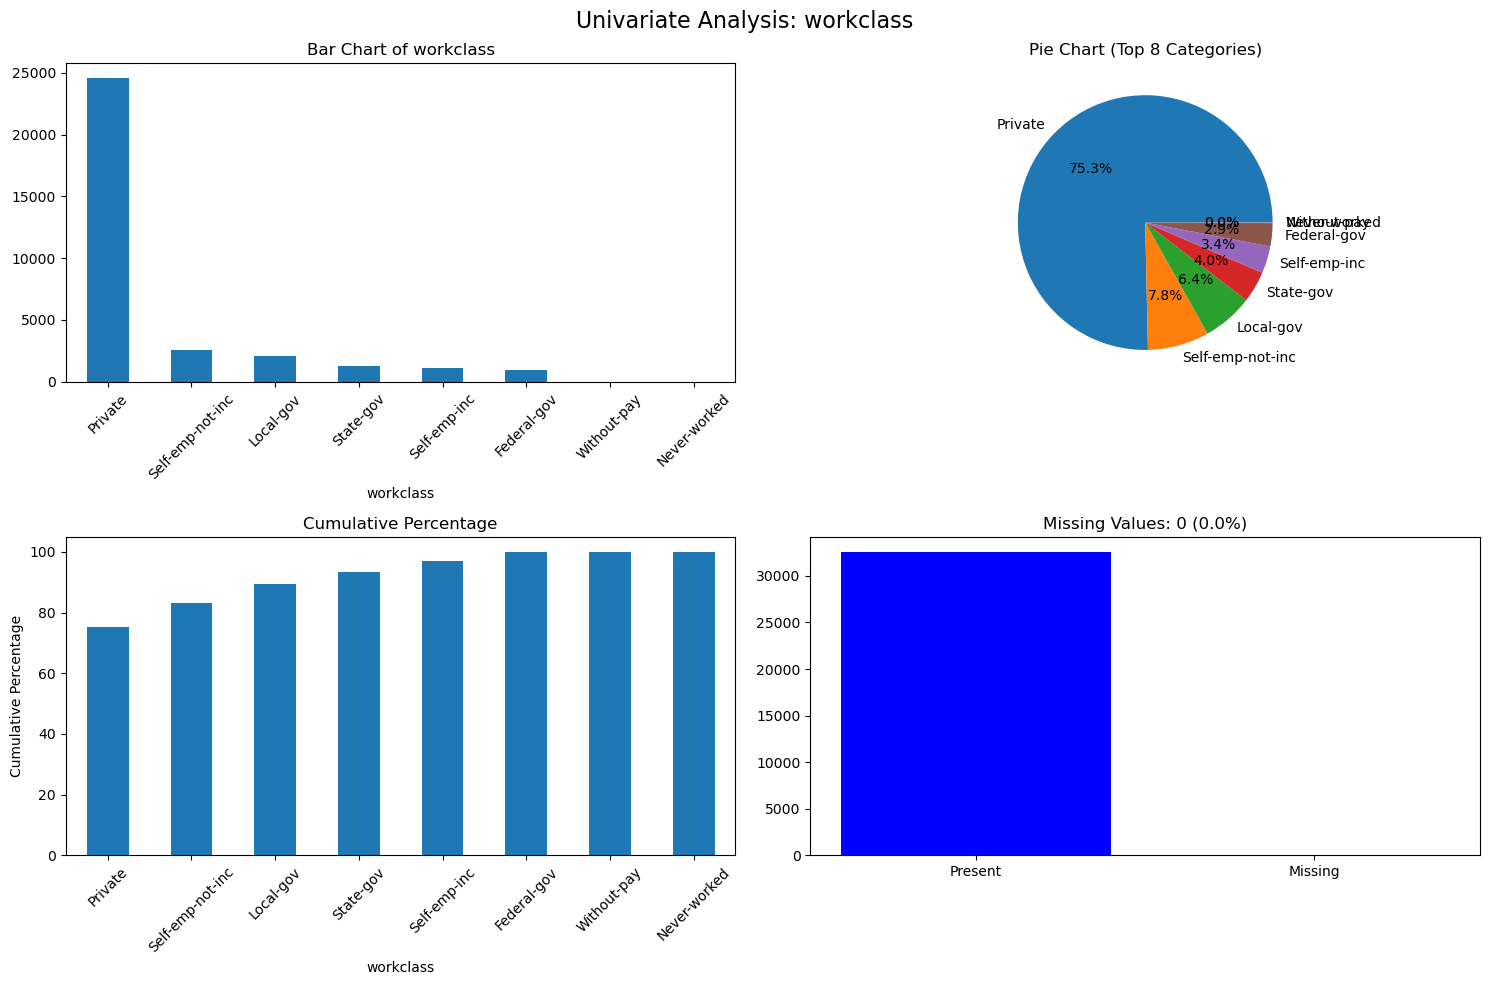

Cardinality (unique values): 8
Most frequent value: Private (24532 times)
Value Counts:
  HS-grad: 10501 (32.3%)
  Some-college: 7291 (22.4%)
  Bachelors: 5355 (16.4%)
  Masters: 1723 (5.3%)
  Assoc-voc: 1382 (4.2%)
  11th: 1175 (3.6%)
  Assoc-acdm: 1067 (3.3%)
  10th: 933 (2.9%)
  7th-8th: 646 (2.0%)
  Prof-school: 576 (1.8%)
... and 6 more categories


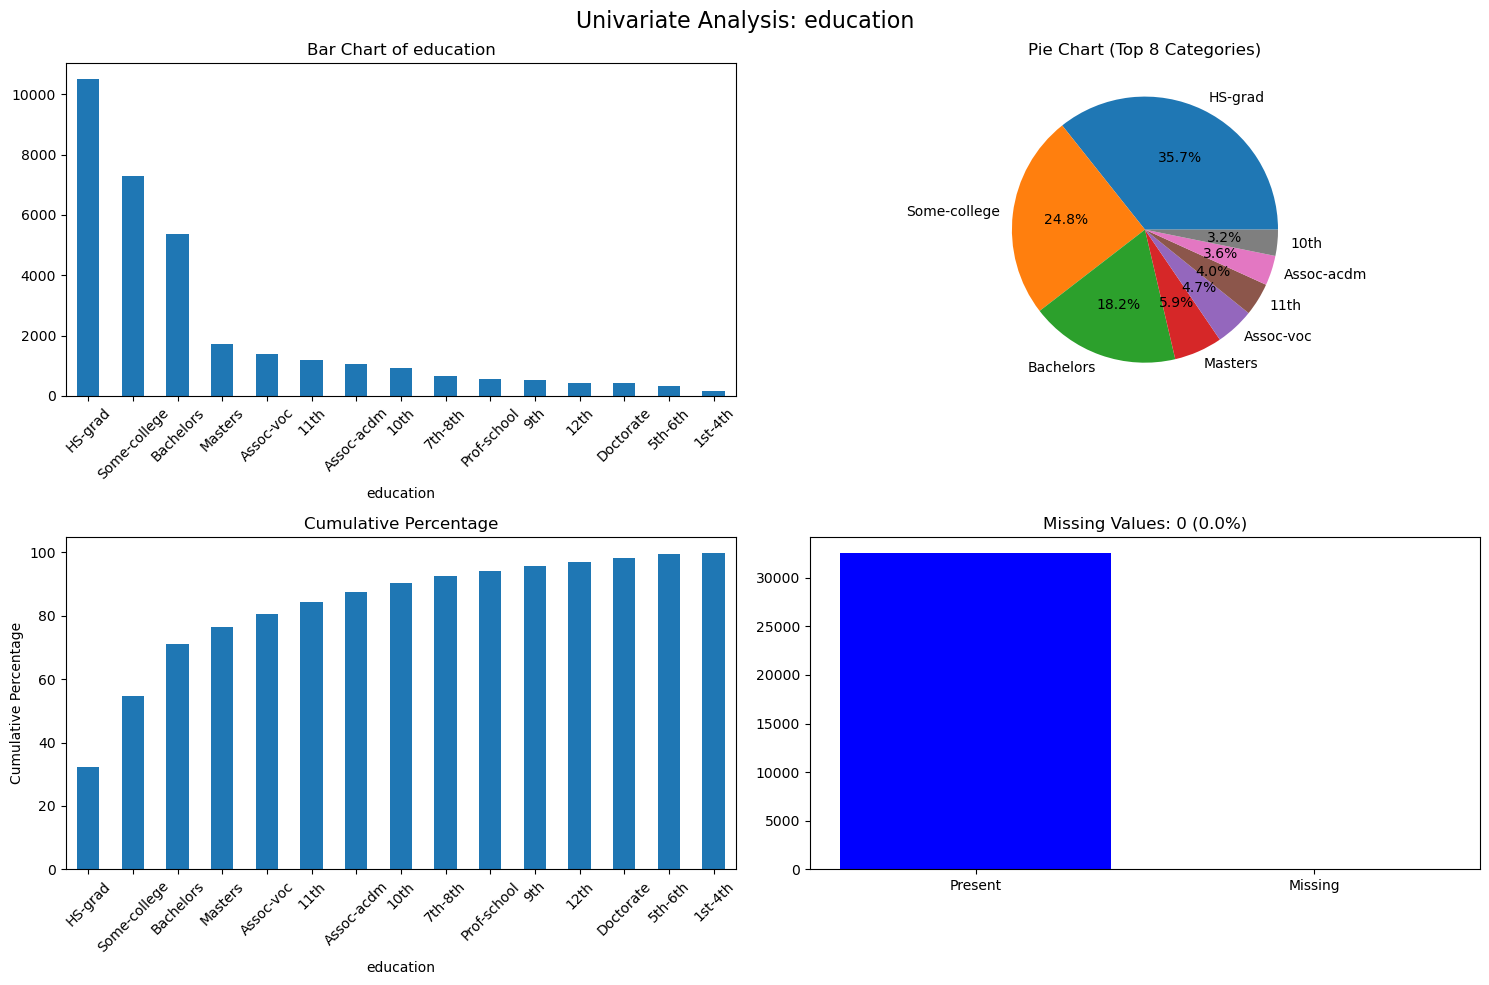

Cardinality (unique values): 16
Most frequent value: HS-grad (10501 times)
Value Counts:
  Married-civ-spouse: 14976 (46.0%)
  Never-married: 10683 (32.8%)
  Divorced: 4443 (13.6%)
  Separated: 1025 (3.1%)
  Widowed: 993 (3.0%)
  Married-spouse-absent: 418 (1.3%)
  Married-AF-spouse: 23 (0.1%)


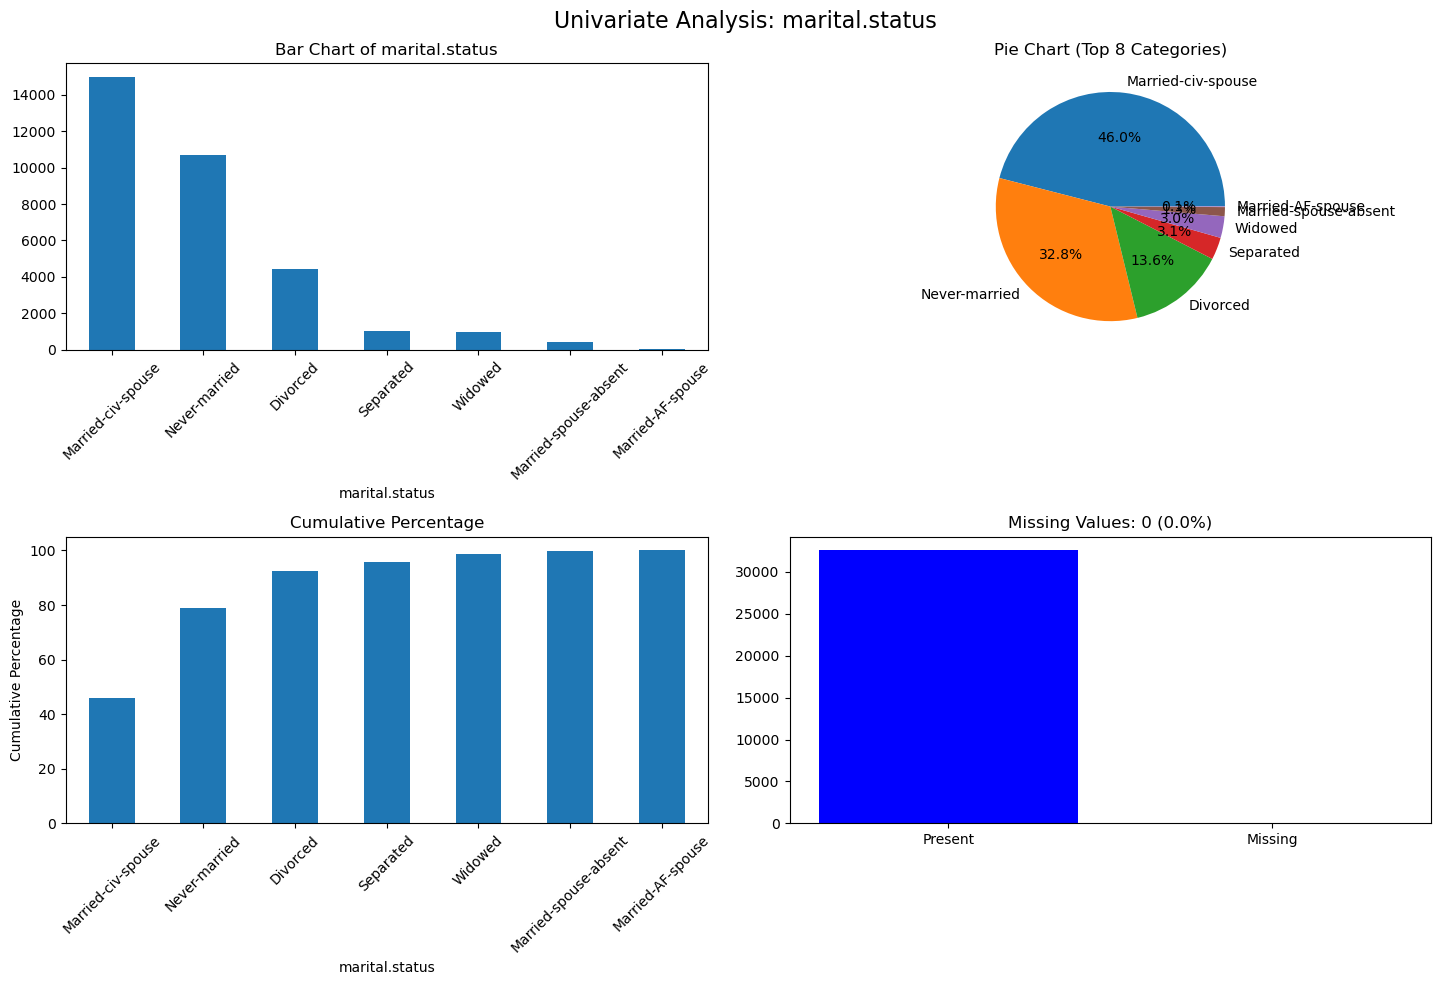

Cardinality (unique values): 7
Most frequent value: Married-civ-spouse (14976 times)
Value Counts:
  Prof-specialty: 4411 (13.5%)
  Exec-managerial: 4370 (13.4%)
  Craft-repair: 4335 (13.3%)
  Adm-clerical: 3992 (12.3%)
  Sales: 3844 (11.8%)
  Other-service: 3486 (10.7%)
  Machine-op-inspct: 2106 (6.5%)
  Transport-moving: 1689 (5.2%)
  Handlers-cleaners: 1449 (4.5%)
  Farming-fishing: 1064 (3.3%)
... and 4 more categories


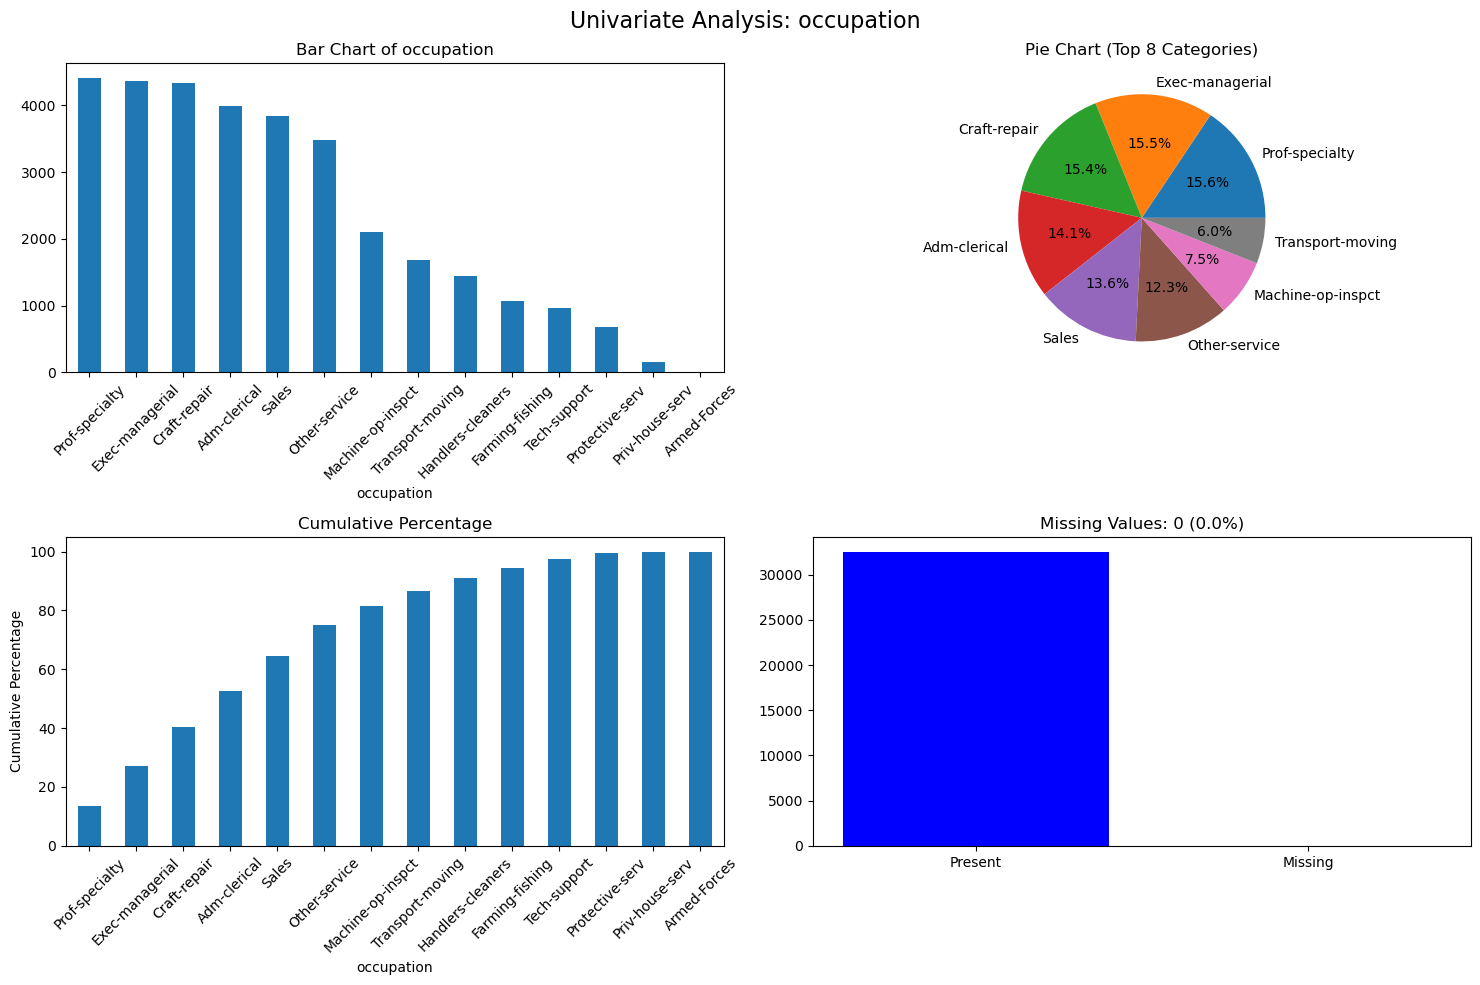

Cardinality (unique values): 14
Most frequent value: Prof-specialty (4411 times)
Value Counts:
  Husband: 13193 (40.5%)
  Not-in-family: 8305 (25.5%)
  Own-child: 5068 (15.6%)
  Unmarried: 3446 (10.6%)
  Wife: 1568 (4.8%)
  Other-relative: 981 (3.0%)


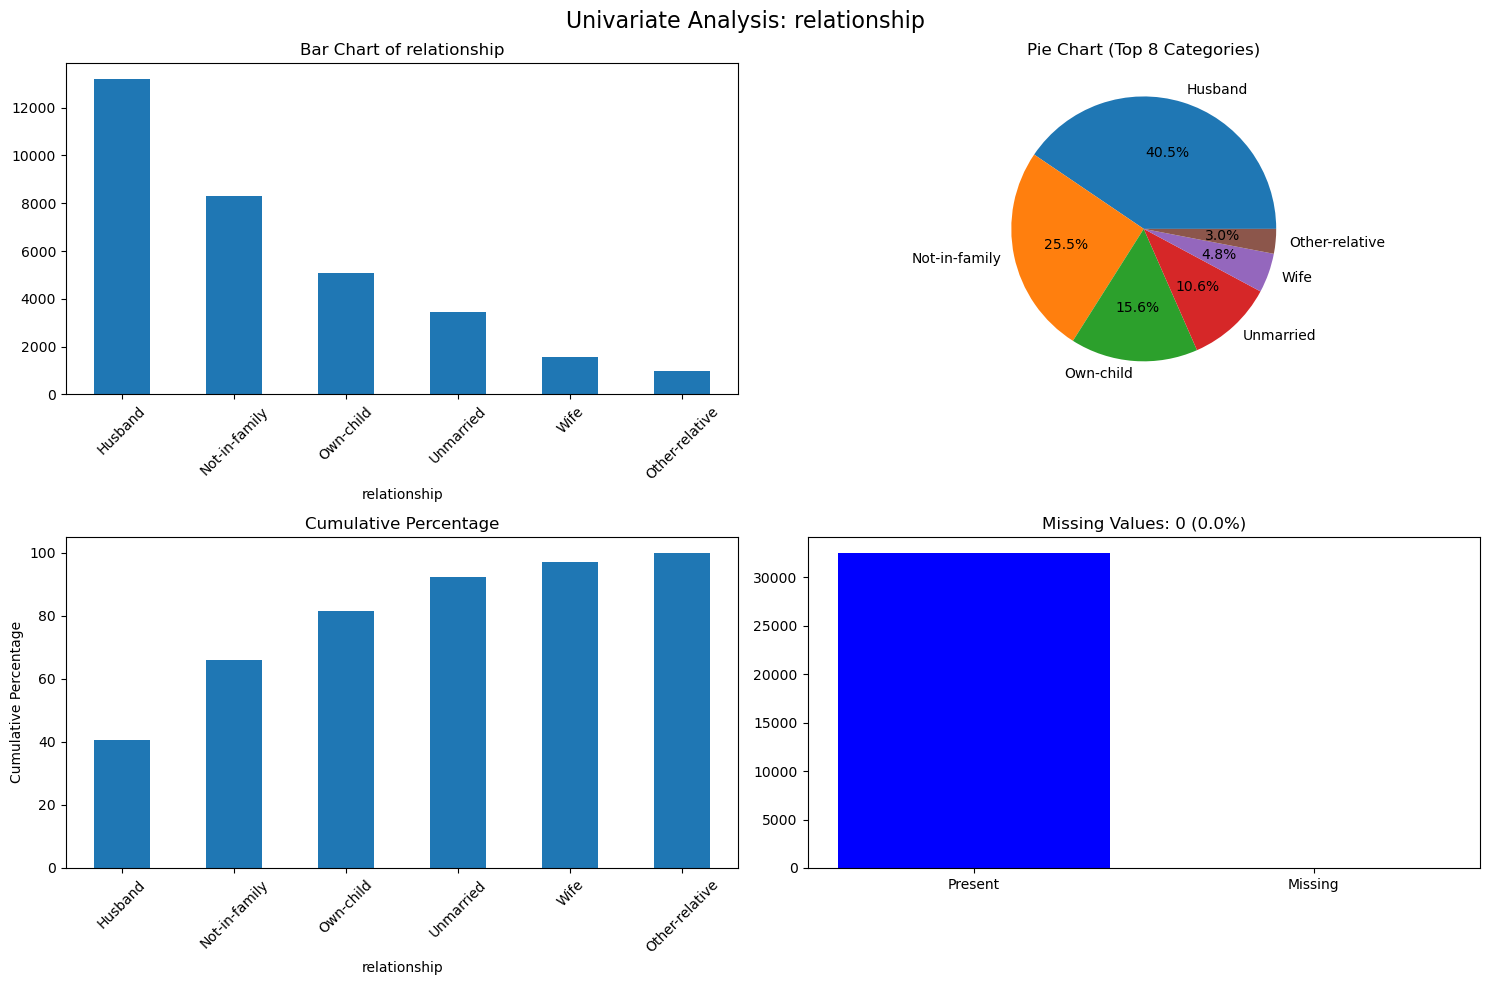

Cardinality (unique values): 6
Most frequent value: Husband (13193 times)
Value Counts:
  White: 27816 (85.4%)
  Black: 3124 (9.6%)
  Asian-Pac-Islander: 1039 (3.2%)
  Amer-Indian-Eskimo: 311 (1.0%)
  Other: 271 (0.8%)


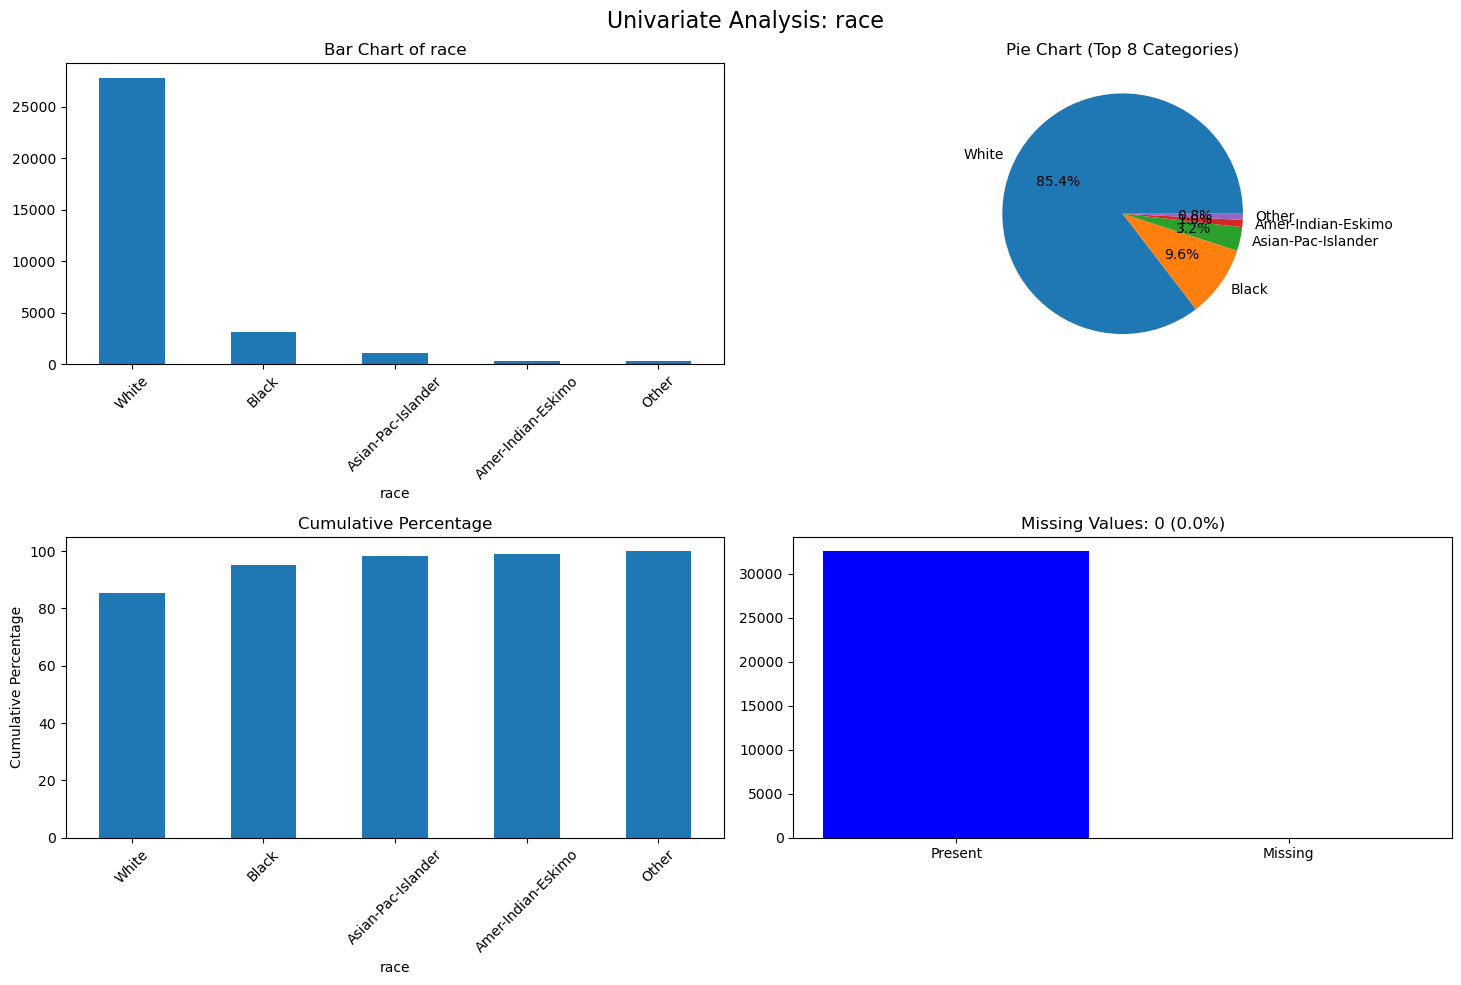

Cardinality (unique values): 5
Most frequent value: White (27816 times)
Value Counts:
  Male: 21790 (66.9%)
  Female: 10771 (33.1%)


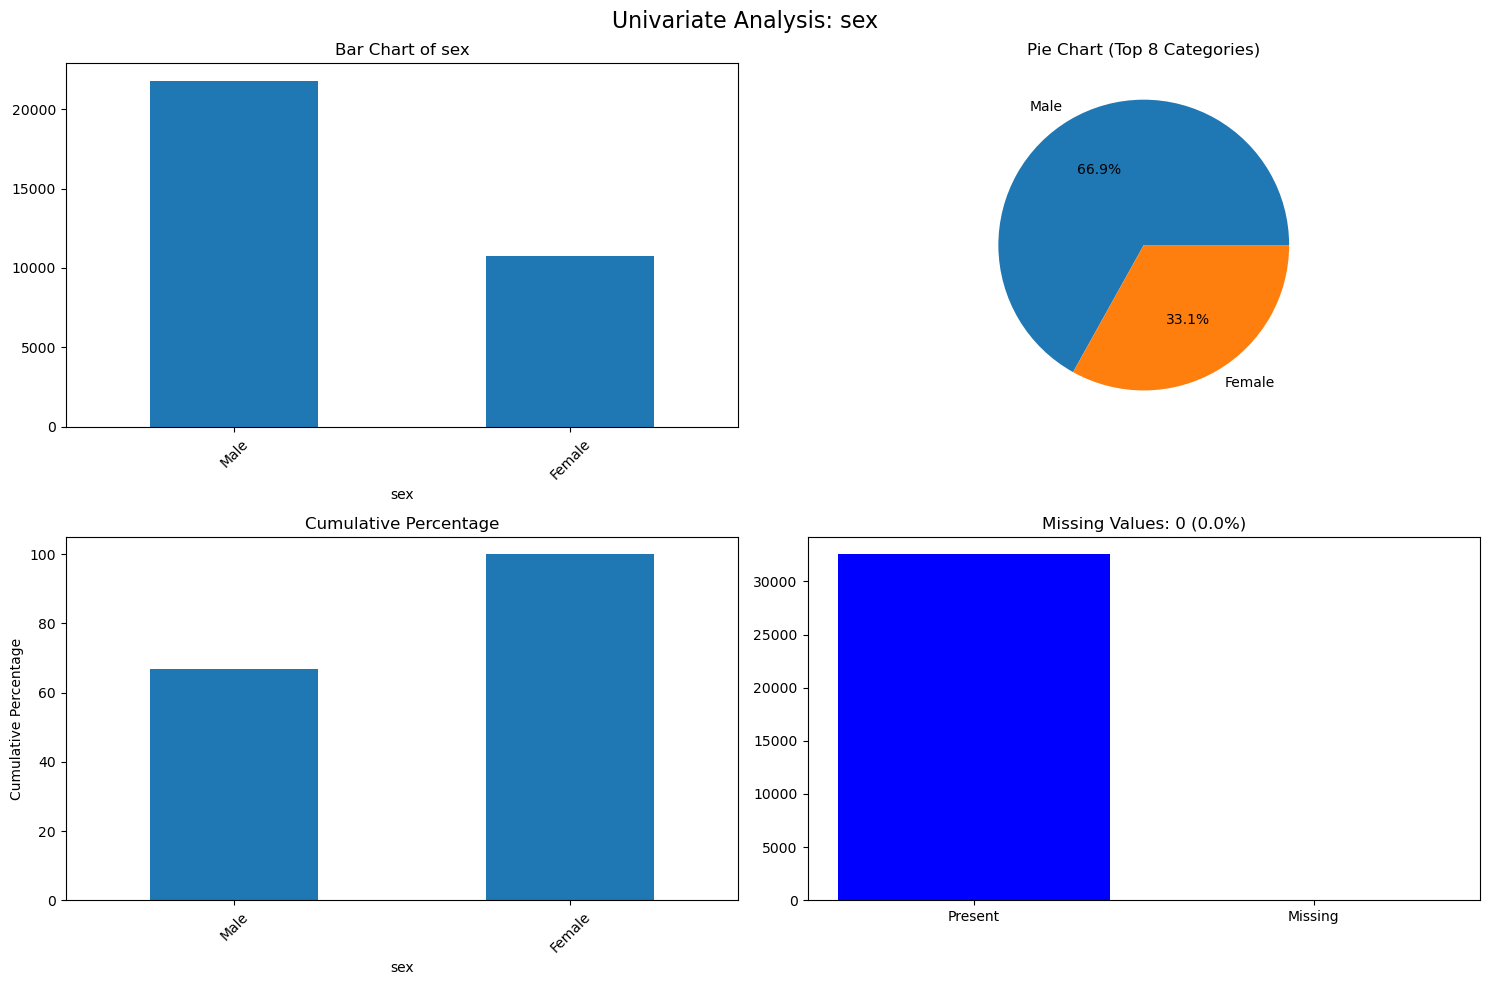

Cardinality (unique values): 2
Most frequent value: Male (21790 times)
Value Counts:
  United-States: 29753 (91.4%)
  Mexico: 643 (2.0%)
  Philippines: 198 (0.6%)
  Germany: 137 (0.4%)
  Canada: 121 (0.4%)
  Puerto-Rico: 114 (0.4%)
  El-Salvador: 106 (0.3%)
  India: 100 (0.3%)
  Cuba: 95 (0.3%)
  England: 90 (0.3%)
... and 31 more categories


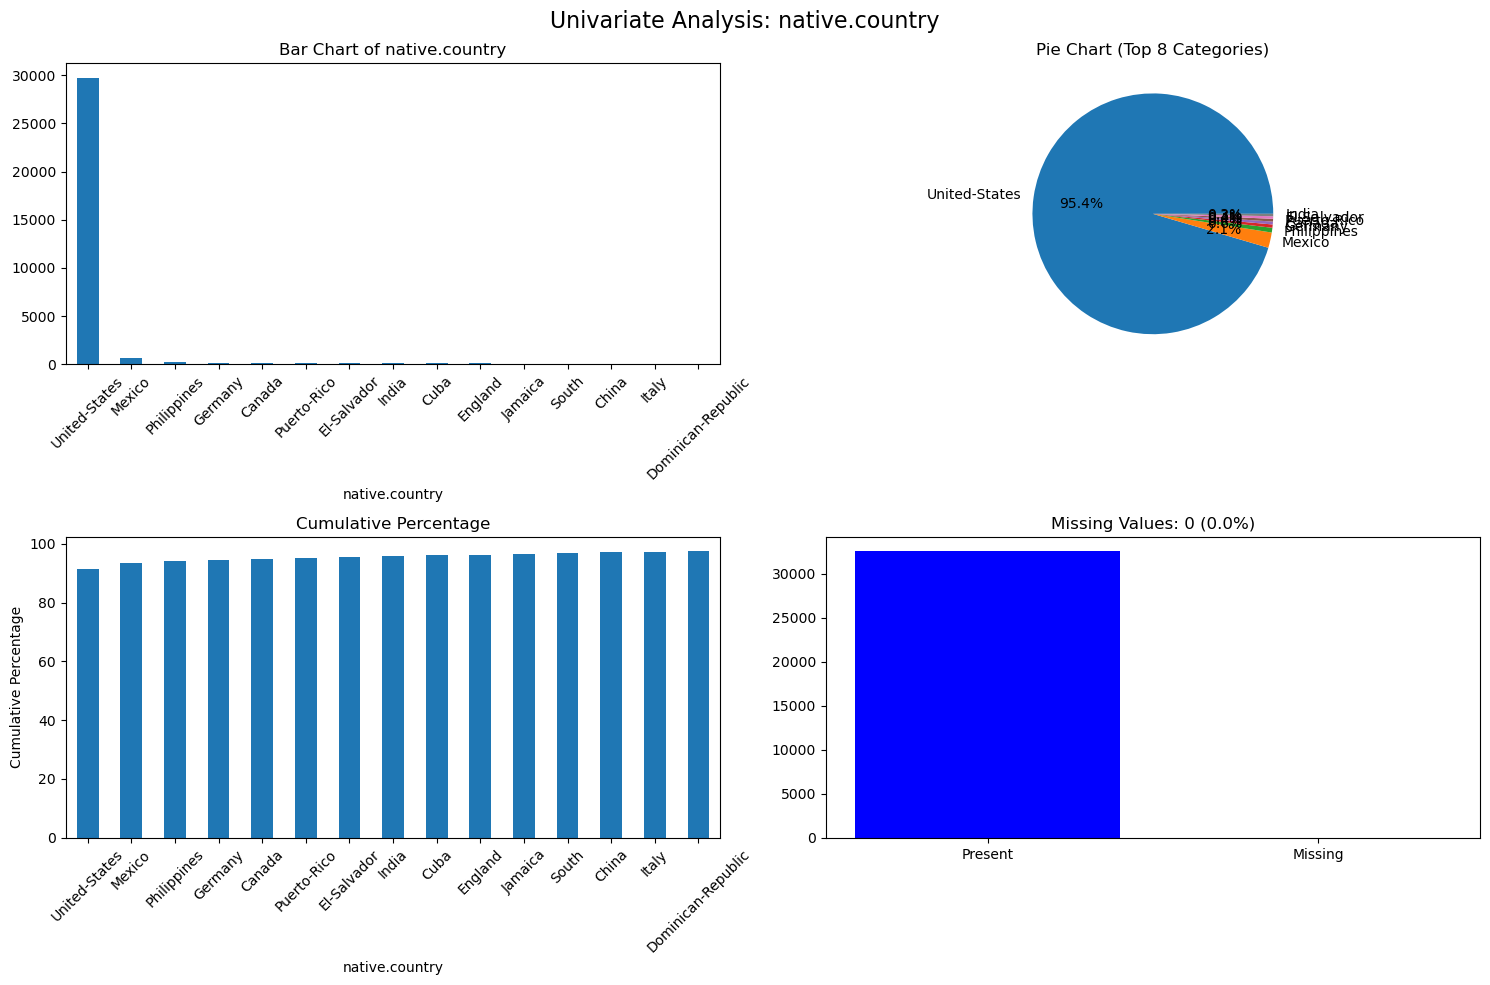

Cardinality (unique values): 41
Most frequent value: United-States (29753 times)
Value Counts:
  <=50K: 24720 (75.9%)
  >50K: 7841 (24.1%)


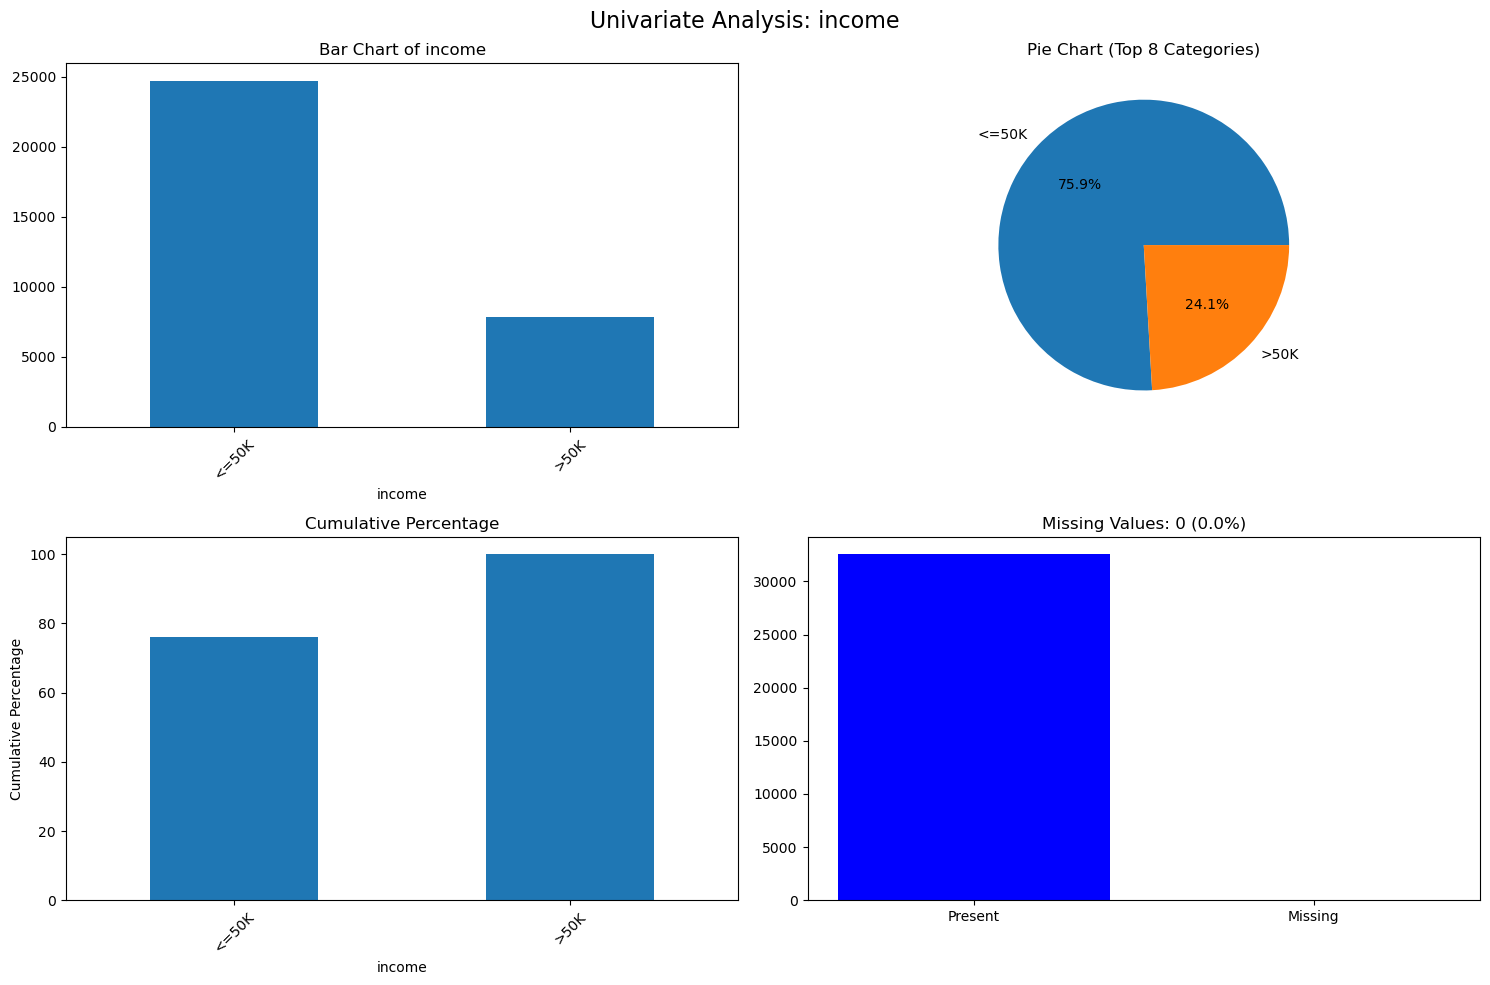

Cardinality (unique values): 2
Most frequent value: <=50K (24720 times)


In [74]:
def univariate_categorical_analysis(df, categorical_columns):
    """Comprehensive univariate analysis for categorical variables"""
    
    for col in categorical_columns:
        
        
        # Value counts and percentages
        value_counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100
        
        print("Value Counts:")
        for category, count in value_counts.head(10).items():
            print(f"  {category}: {count} ({percentages[category]:.1f}%)")
        
        if len(value_counts) > 10:
            print(f"... and {len(value_counts) - 10} more categories")
        
        # Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'Univariate Analysis: {col}', fontsize=16)
        
        # Bar chart (top categories)
        value_counts.head(15).plot(kind='bar', ax=axes[0,0])
        axes[0,0].set_title(f'Bar Chart of {col}')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # Pie chart (top 8 categories)
        top_categories = value_counts.head(8)
        axes[0,1].pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%')
        axes[0,1].set_title(f'Pie Chart (Top 8 Categories)')
        
        # Cumulative distribution
        cumulative_pct = (value_counts.cumsum() / value_counts.sum() * 100)
        cumulative_pct.head(15).plot(kind='bar', ax=axes[1,0])
        axes[1,0].set_title(f'Cumulative Percentage')
        axes[1,0].tick_params(axis='x', rotation=45)
        axes[1,0].set_ylabel('Cumulative Percentage')
        
        # Missing values visualization
        missing_count = df[col].isnull().sum()
        present_count = len(df) - missing_count
        axes[1,1].bar(['Present', 'Missing'], [present_count, missing_count], color=['blue', 'red'])
        axes[1,1].set_title(f'Missing Values: {missing_count} ({missing_count/len(df)*100:.1f}%)')
        
        plt.tight_layout()
        plt.show()
        
        # Cardinality check
        print(f"Cardinality (unique values): {df[col].nunique()}")
        print(f"Most frequent value: {value_counts.index[0]} ({value_counts.iloc[0]} times)")

# Usage
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
univariate_categorical_analysis(df, categorical_cols)

### Bivariate Analysis

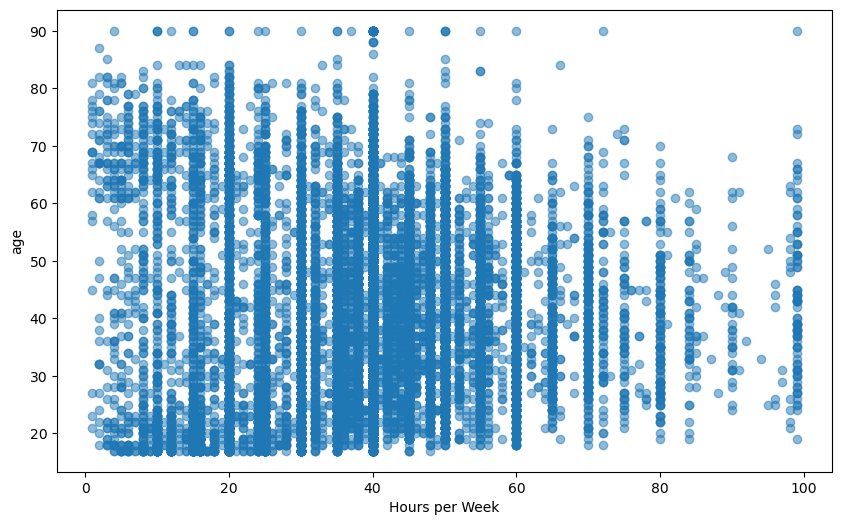

In [81]:
# Simple scatter plot
# Numerical Data
plt.figure(figsize=(10, 6))
plt.scatter(df['hours.per.week'], df['age'], alpha=0.5)
plt.xlabel('Hours per Week')
plt.ylabel('age')
plt.show()

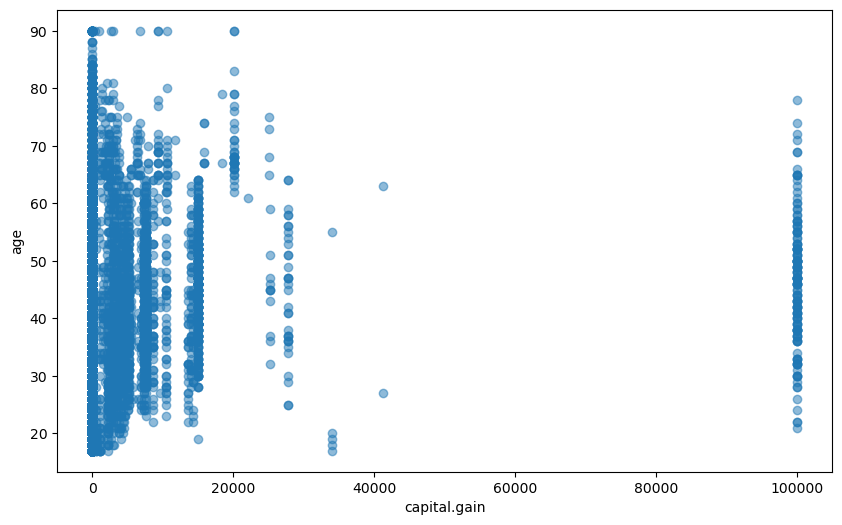

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(df['capital.gain'], df['age'], alpha=0.5)
plt.xlabel('capital.gain')
plt.ylabel('age')
plt.show()

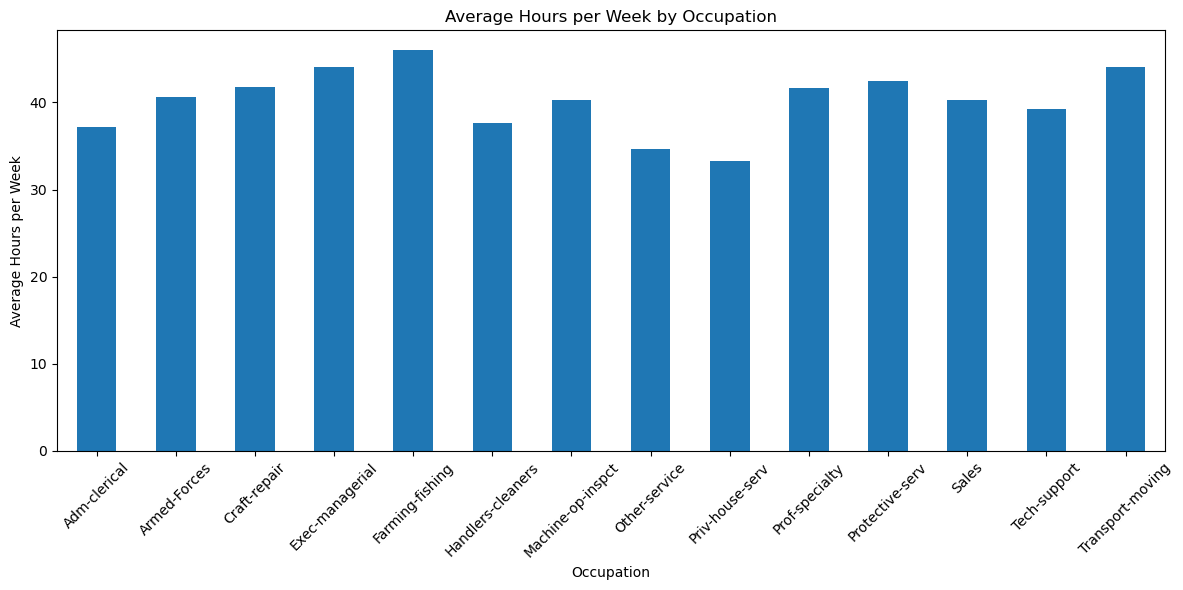

In [87]:
# Simple bar plot
plt.figure(figsize=(12, 6))
df.groupby('occupation')['hours.per.week'].mean().plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Average Hours per Week')
plt.title('Average Hours per Week by Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

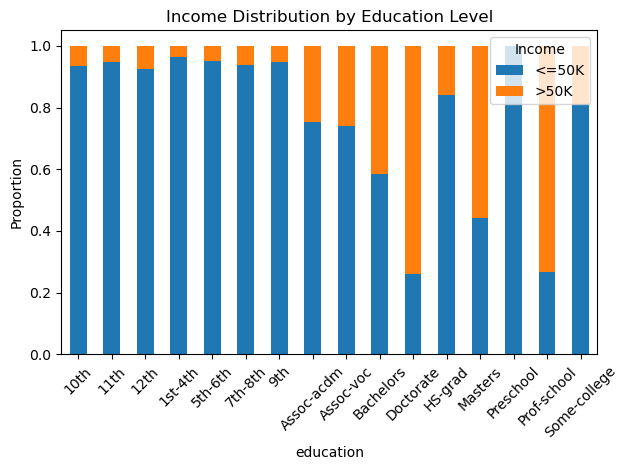

In [88]:
plt.figure(figsize=(12, 6))
pd.crosstab(df['education'], df['income'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Income Distribution by Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

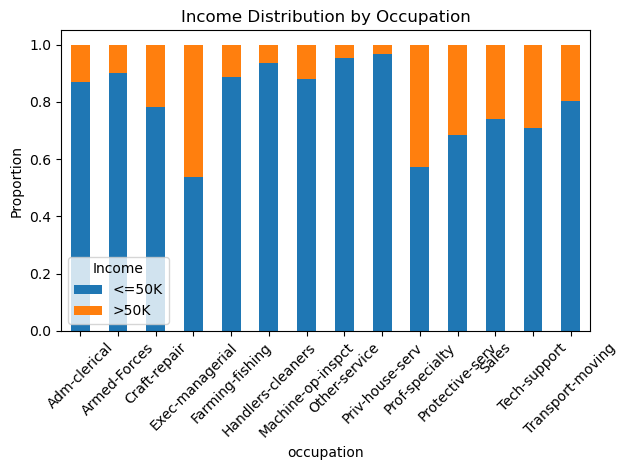

In [89]:
plt.figure(figsize=(14, 6))
pd.crosstab(df['occupation'], df['income'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Income Distribution by Occupation')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

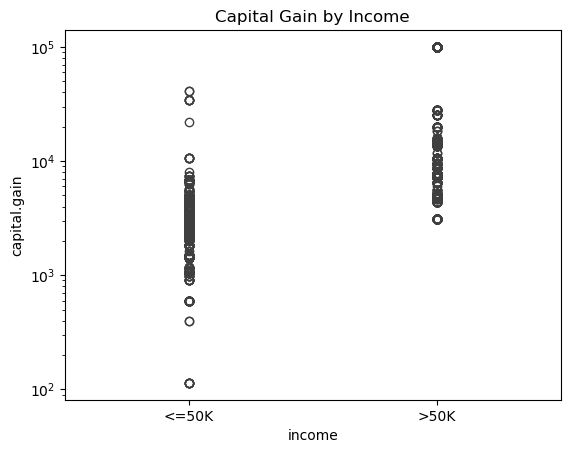

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is an existing pandas DataFrame
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 1) # This line defines the 'axes' variable

sns.boxplot(x='income', y='capital.gain', data=df, ax=axes)
axes.set_title('Capital Gain by Income')
axes.set_yscale('log') # Log scale for better visualization
plt.show()

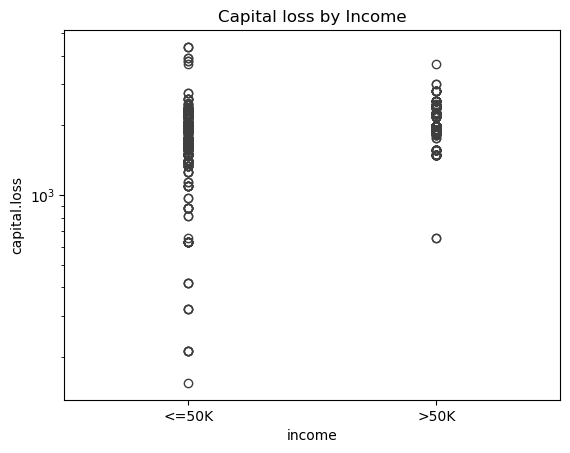

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is an existing pandas DataFrame
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 1) # This line defines the 'axes' variable

sns.boxplot(x='income', y='capital.loss', data=df, ax=axes)
axes.set_title('Capital loss by Income')
axes.set_yscale('log') # Log scale for better visualization
plt.show()

In [95]:
## Outlier Detection

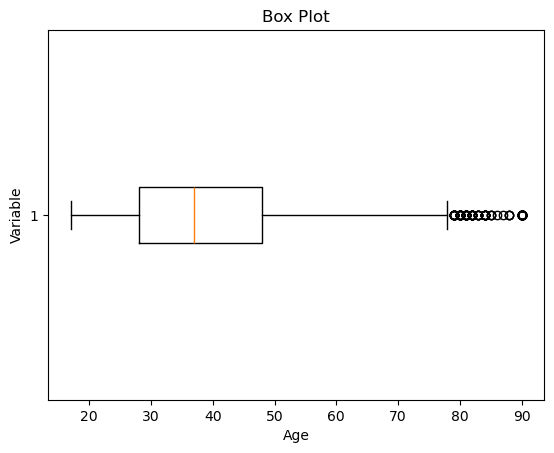

In [98]:
plt.boxplot(df['age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

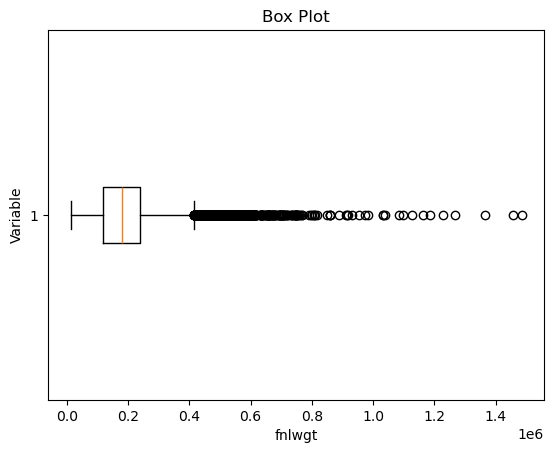

In [99]:
plt.boxplot(df['fnlwgt'], vert=False)
plt.ylabel('Variable')
plt.xlabel('fnlwgt')
plt.title('Box Plot')
plt.show()

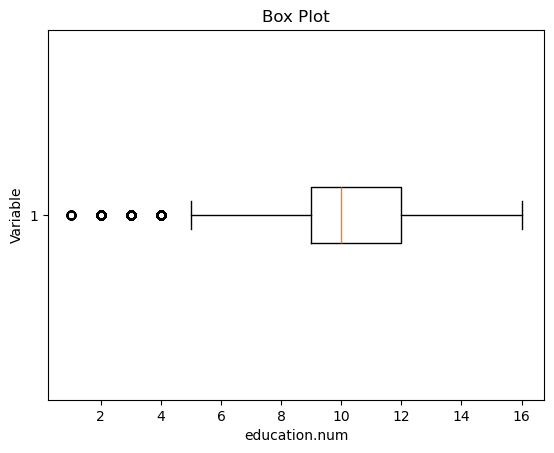

In [101]:
plt.boxplot(df['education.num'], vert=False)
plt.ylabel('Variable')
plt.xlabel('education.num')
plt.title('Box Plot')
plt.show()

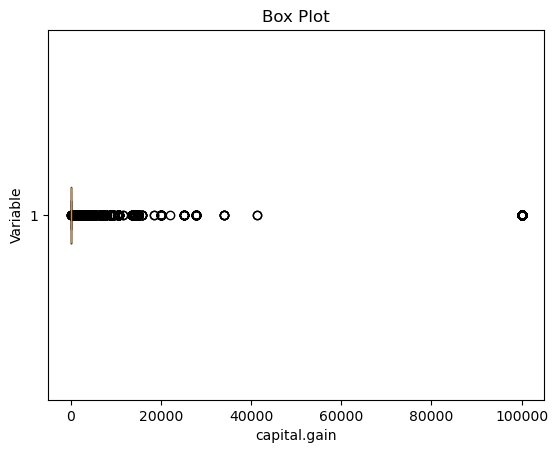

In [102]:
plt.boxplot(df['capital.gain'], vert=False)
plt.ylabel('Variable')
plt.xlabel('capital.gain')
plt.title('Box Plot')
plt.show()

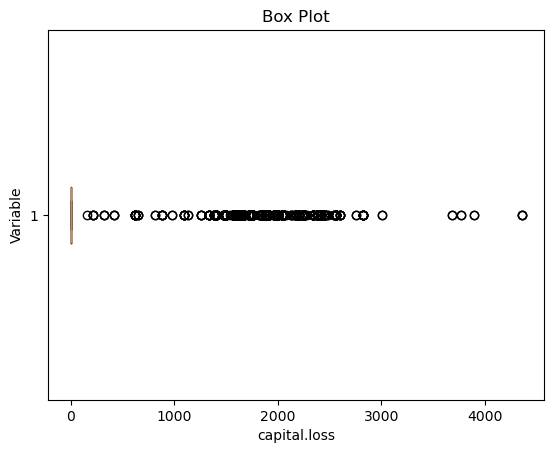

In [103]:
plt.boxplot(df['capital.loss'], vert=False)
plt.ylabel('Variable')
plt.xlabel('capital.loss')
plt.title('Box Plot')
plt.show()

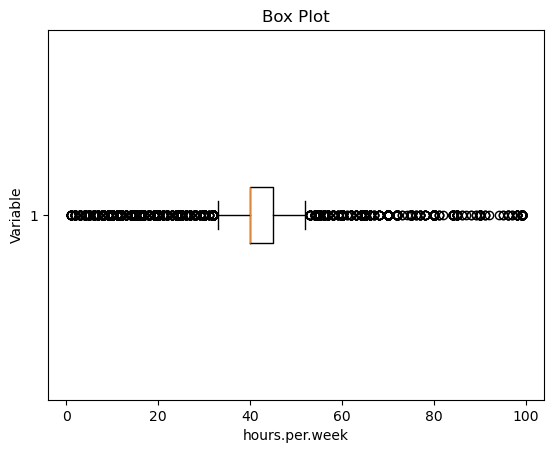

In [104]:
plt.boxplot(df['hours.per.week'], vert=False)
plt.ylabel('Variable')
plt.xlabel('hours.per.week')
plt.title('Box Plot')
plt.show()

## Feature correlation analysis

In [108]:
correlation_matrix = df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].corr(method='pearson')
print(correlation_matrix)

                     age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education.num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital.gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital.loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours.per.week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours.per.week  
age                   0.068756  
fnlwgt               -0.018768  
education.num         0.148123  
capital.gain          0.078409  
capital.loss          0.054256  
hours.per.week        1.000000  


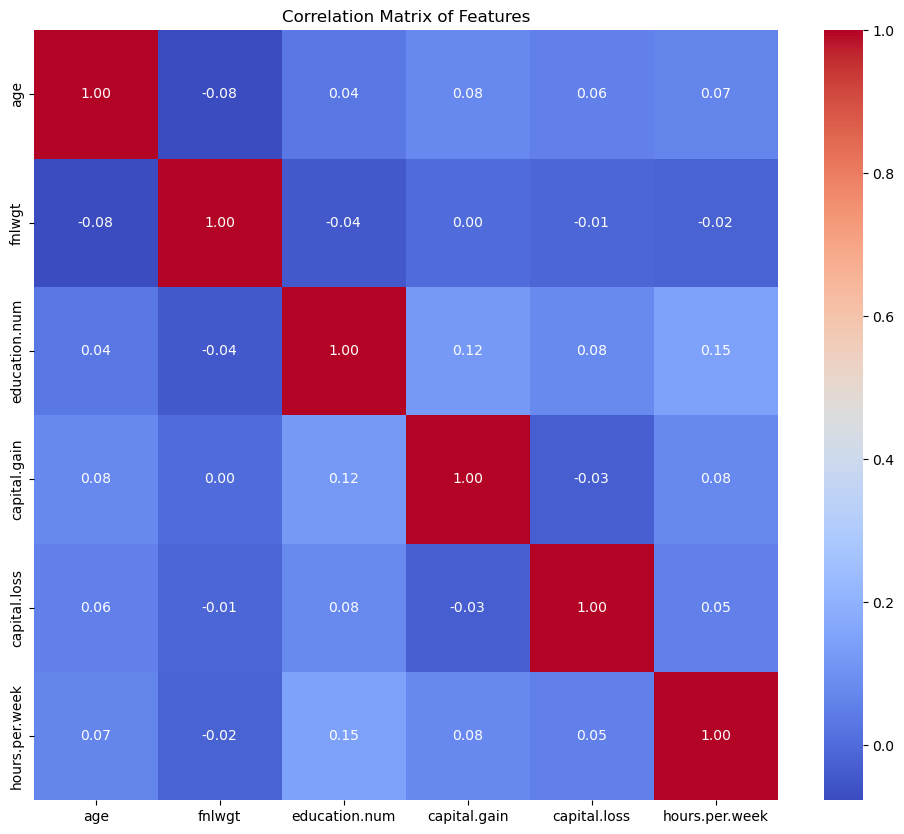

In [111]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [126]:
df2 = pd.get_dummies(df)

In [127]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0  Handlers-cleaners  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2    Exec-managerial      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [128]:
correlation_matrix = df2.corr()
correlation_matrix.head()

age    fnlwgt  education.num  capital.gain  capital.loss  \
age            1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt        -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education.num  0.036527 -0.043195       1.000000      0.122630      0.079923   
capital.gain   0.077674  0.000432       0.122630      1.000000     -0.031615   
capital.loss   0.057775 -0.010252       0.079923     -0.031615      1.000000   

               hours.per.week  workclass_Federal-gov  workclass_Local-gov  \
age                  0.068756               0.051227             0.060901   
fnlwgt              -0.018768              -0.007525            -0.002828   
education.num        0.148123               0.060518             0.097941   
capital.gain         0.078409              -0.005768            -0.007007   
capital.loss         0.054256               0.010798             0.014668   

               workclass_Never-worked  workclass_Private  ...  \
age                         -0.019362          -0.188702  ...   
fnlwgt                       0.005031           0.044182  ...   
education.num               -0.015117          -0.168038  ...   
capital.gain                -0.002140          -0.049602  ...   
capital.loss                -0.003177          -0.037895  ...   

               native.country_Scotland  native.country_South  \
age                           0.002583              0.000613   
fnlwgt                       -0.003790             -0.012365   
education.num                 0.001264              0.016046   
capital.gain                 -0.001680              0.005323   
capital.loss                 -0.004160              0.010114   

               native.country_Taiwan  native.country_Thailand  \
age                        -0.013816                -0.006271   
fnlwgt                     -0.001252                -0.001250   
education.num               0.049472                 0.007896   
capital.gain                0.005735                -0.003432   
capital.loss                0.006637                -0.005095   

               native.country_Trinadad&Tobago  native.country_United-States  \
age                                  0.004843                      0.017993   
fnlwgt                               0.005273                     -0.079790   
education.num                       -0.017071                      0.122965   
capital.gain                        -0.003526                      0.011299   
capital.loss                         0.008102                      0.014458   

               native.country_Vietnam  native.country_Yugoslavia  \
age                     -1.505357e-02                   0.000375   
fnlwgt                  -1.139827e-02                   0.005501   
education.num           -7.483035e-03                  -0.001234   
capital.gain            -2.564276e-03                  -0.002193   
capital.loss            -5.997599e-07                  -0.004804   

               income_<=50K  income_>50K  
age               -0.234037     0.234037  
fnlwgt             0.009463    -0.009463  
education.num     -0.335154     0.335154  
capital.gain      -0.223329     0.223329  
capital.loss      -0.150526     0.150526  

[5 rows x 107 columns]

<Axes: >

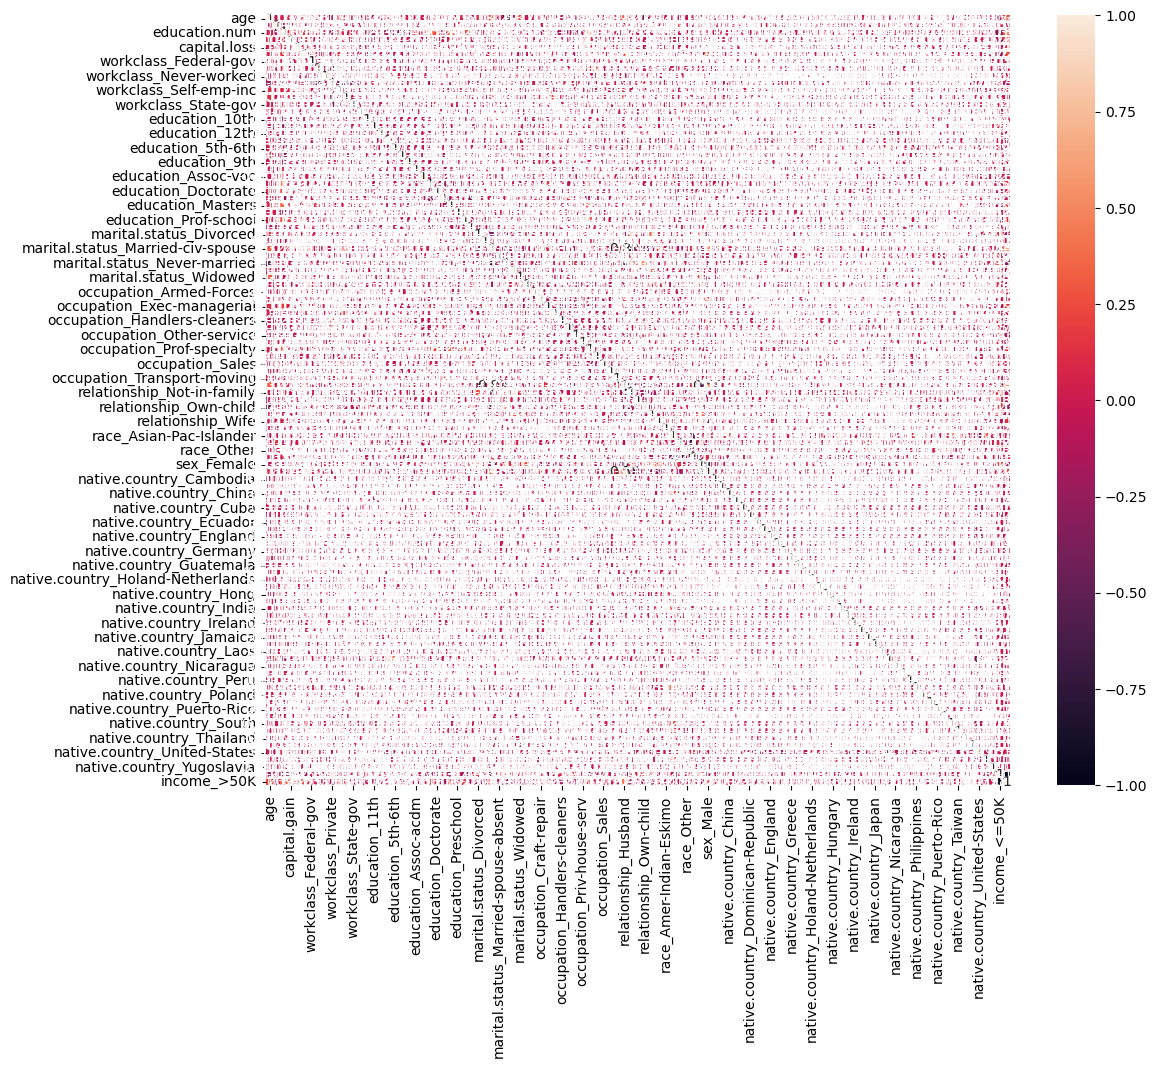

In [130]:
plt.figure(figsize= (12,10))
sns.heatmap(correlation_matrix, annot = True)

In [132]:
## Encoding the categorical columns

In [133]:
## One Hot Encoding

In [136]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df_pandas_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income'], drop_first=True)
df_pandas_encoded.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0   90   77053              9             0          4356              40   
1   82  132870              9             0          4356              18   
2   66  186061             10             0          4356              40   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False               True   
1                False                   False               True   
2                False                   False               True   
3                False                   False               True   
4                False                   False               True   

   workclass_Self-emp-inc  ...  native.country_Puerto-Rico  \
0                   False  ...                       False   
1                   False  ...                       False   
2                   False  ...                       False   
3                   False  ...                       False   
4                   False  ...                       False   

   native.country_Scotland  native.country_South  native.country_Taiwan  \
0                    False                 False                  False   
1                    False                 False                  False   
2                    False                 False                  False   
3                    False                 False                  False   
4                    False                 False                  False   

   native.country_Thailand  native.country_Trinadad&Tobago  \
0                    False                           False   
1                    False                           False   
2                    False                           False   
3                    False                           False   
4                    False                           False   

   native.country_United-States  native.country_Vietnam  \
0                          True                   False   
1                          True                   False   
2                          True                   False   
3                          True                   False   
4                          True                   False   

   native.country_Yugoslavia  income_>50K  
0                      False        False  
1                      False        False  
2                      False        False  
3                      False        False  
4                      False        False  

[5 rows x 98 columns]

In [137]:
## ordinal Encoding

In [145]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Specify the columns to encode
categorical_features = ['education', 'income']

education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 
                   'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
income_order = ['<=50K', '>50K']

# Set up the OrdinalEncoder using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=[education_order, income_order]), categorical_features)
    ],
    remainder='passthrough'  # This keeps all other columns
)

# Apply the transformations
encoded_data = preprocessor.fit_transform(df)

# Get all column names (original order is preserved)
all_columns = categorical_features + [col for col in df.columns if col not in categorical_features]
encoded_df = pd.DataFrame(encoded_data, columns=all_columns)

encoded_df.head()

education income age workclass  fnlwgt education.num marital.status  \
0       8.0    0.0  90   Private   77053             9        Widowed   
1       8.0    0.0  82   Private  132870             9        Widowed   
2       9.0    0.0  66   Private  186061            10        Widowed   
3       3.0    0.0  54   Private  140359             4       Divorced   
4       9.0    0.0  41   Private  264663            10      Separated   

          occupation   relationship   race     sex capital.gain capital.loss  \
0  Handlers-cleaners  Not-in-family  White  Female            0         4356   
1    Exec-managerial  Not-in-family  White  Female            0         4356   
2    Exec-managerial      Unmarried  Black  Female            0         4356   
3  Machine-op-inspct      Unmarried  White  Female            0         3900   
4     Prof-specialty      Own-child  White  Female            0         3900   

  hours.per.week native.country  
0             40  United-States  
1             18  United-States  
2             40  United-States  
3             40  United-States  
4             40  United-States

In [148]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

ordinal_features = ['education', 'income']
nominal_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 
                   'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
income_order = ['<=50K', '>50K']

workclass_order = sorted(df['workclass'].unique())
marital_order = sorted(df['marital.status'].unique())
occupation_order = sorted(df['occupation'].unique())
relationship_order = sorted(df['relationship'].unique())
race_order = sorted(df['race'].unique())
sex_order = sorted(df['sex'].unique())
country_order = sorted(df['native.country'].unique())


preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[education_order, income_order]), ordinal_features),
        ('nominal', OrdinalEncoder(categories=[workclass_order, marital_order, occupation_order, 
                                             relationship_order, race_order, sex_order, country_order]), nominal_features)
    ],
    remainder='passthrough'
)

encoded_data = preprocessor.fit_transform(df)


feature_names = (ordinal_features + nominal_features + 
                [col for col in df.columns if col not in ordinal_features + nominal_features])

encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
df.head()
encoded_df.head()

education  income  workclass  marital.status  occupation  relationship  \
0        8.0     0.0        3.0             6.0         5.0           1.0   
1        8.0     0.0        3.0             6.0         3.0           1.0   
2        9.0     0.0        3.0             6.0         3.0           4.0   
3        3.0     0.0        3.0             0.0         6.0           4.0   
4        9.0     0.0        3.0             5.0         9.0           3.0   

   race  sex  native.country   age    fnlwgt  education.num  capital.gain  \
0   4.0  0.0            38.0  90.0   77053.0            9.0           0.0   
1   4.0  0.0            38.0  82.0  132870.0            9.0           0.0   
2   2.0  0.0            38.0  66.0  186061.0           10.0           0.0   
3   4.0  0.0            38.0  54.0  140359.0            4.0           0.0   
4   4.0  0.0            38.0  41.0  264663.0           10.0           0.0   

   capital.loss  hours.per.week  
0        4356.0            40.0  
1        4356.0            18.0  
2        4356.0            40.0  
3        3900.0            40.0  
4        3900.0            40.0

## Scaling the numerical Features

## Min Max Scaling

In [152]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Identify numerical columns (excluding encoded categorical)
numerical_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df_scaled.head()

age workclass  fnlwgt     education  education.num marital.status  \
0  1.000000   Private   77053       HS-grad       0.533333        Widowed   
1  0.890411   Private  132870       HS-grad       0.533333        Widowed   
2  0.671233   Private  186061  Some-college       0.600000        Widowed   
3  0.506849   Private  140359       7th-8th       0.200000       Divorced   
4  0.328767   Private  264663  Some-college       0.600000      Separated   

          occupation   relationship   race     sex  capital.gain  \
0  Handlers-cleaners  Not-in-family  White  Female           0.0   
1    Exec-managerial  Not-in-family  White  Female           0.0   
2    Exec-managerial      Unmarried  Black  Female           0.0   
3  Machine-op-inspct      Unmarried  White  Female           0.0   
4     Prof-specialty      Own-child  White  Female           0.0   

   capital.loss  hours.per.week native.country income  
0      1.000000        0.397959  United-States  <=50K  
1      1.000000        0.173469  United-States  <=50K  
2      1.000000        0.397959  United-States  <=50K  
3      0.895317        0.397959  United-States  <=50K  
4      0.895317        0.397959  United-States  <=50K

## Standard Scaling

In [153]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Identify numerical columns
numerical_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df_scaled.head()

age workclass  fnlwgt     education  education.num marital.status  \
0  3.769612   Private   77053       HS-grad      -0.420060        Widowed   
1  3.183112   Private  132870       HS-grad      -0.420060        Widowed   
2  2.010110   Private  186061  Some-college      -0.031360        Widowed   
3  1.130359   Private  140359       7th-8th      -2.363558       Divorced   
4  0.177296   Private  264663  Some-college      -0.031360      Separated   

          occupation   relationship   race     sex  capital.gain  \
0  Handlers-cleaners  Not-in-family  White  Female      -0.14592   
1    Exec-managerial  Not-in-family  White  Female      -0.14592   
2    Exec-managerial      Unmarried  Black  Female      -0.14592   
3  Machine-op-inspct      Unmarried  White  Female      -0.14592   
4     Prof-specialty      Own-child  White  Female      -0.14592   

   capital.loss  hours.per.week native.country income  
0     10.593507       -0.035429  United-States  <=50K  
1     10.593507       -1.817204  United-States  <=50K  
2     10.593507       -0.035429  United-States  <=50K  
3      9.461864       -0.035429  United-States  <=50K  
4      9.461864       -0.035429  United-States  <=50K